# Delayed tasks analysis


In [26]:
# allow for automatic reloading of classes and function when updating the code
%load_ext autoreload
%autoreload 2 

# Import Session and Experiment class with helper functions
from trialexp.process.data_import import *
from trialexp.utils.data_organisation import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Variables

In [2]:
import pandas as pd
from pathlib import Path
trial_window = [-2000, 6000] # in ms

# time limit around trigger to perform an event
# determine successful trials
# timelim = [1000, 4000] # in ms

# Digital channel nb of the pyphotometry device
# on which rsync signal is sent (from pycontrol device)
rsync_chan = 2

basefolder = Path(os.getcwd()).parent.parent

# These must be absolute paths
# use this to use within package tasks files (in params)
tasksfile = Path(basefolder,'params','tasks_params.csv')
# use this to put a local full path
#tasksfile = -r'C:/.../tasks_params.csv' 

# from sample_data

# # From jade
# photometry_dir = Path('/home/MRC.OX.AC.UK/phar0732/ettin/Data/head-fixed/photometry')
# pycontrol_dir = Path('/home/MRC.OX.AC.UK/phar0732/ettin/Data/head-fixed/pycontrol')

# # # From julien-pc
# photometry_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\test_folder\delayed_go\pyphotometry\delayed_go_dual_2022'
# pycontrol_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\test_folder\delayed_go\pycontrol\delayed_go_dual_2022'

#From laptop
photometry_dir = r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pyphotometry\reaching_go_spout_incr_break2_nov22'
pycontrol_dir = r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pycontrol\reaching_go_spout_incr_break2_nov22'

video_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\videos'
tasks = pd.read_csv(tasksfile, usecols=[1, 2, 3, 4], index_col=False)


### Create an experiment object


In [4]:
# Load all raw text sessions in the indicated folder or a sessions.pkl file
# if already existing in folder_path
exp_cohort = Experiment(path=pycontrol_dir, int_subject_IDs=True, update=True, verbose=False)

### Perform extraction of behavioural information by trial

In [5]:
# Process the whole experimental folder by trials


exp_cohort.process_exp_by_trial(trial_window, timelim=None, tasksfile=tasksfile, verbose=True)

# Save the file as sessions.pkl in folder_path
exp_cohort.save()

processing by trial: kms061-2023-02-06-103133.txt task: reaching_go_spout_incr_break2_nov22
processing by trial: kms058-2023-02-06-104132.txt task: reaching_go_spout_incr_break2_nov22
processing by trial: kms063-2023-02-06-110950.txt task: reaching_go_spout_incr_break2_nov22
processing by trial: kms062-2023-02-06-112913.txt task: reaching_go_spout_incr_break2_nov22
processing by trial: kms058-2023-02-07-105430.txt task: reaching_go_spout_incr_break2_nov22
processing by trial: kms062-2023-02-07-115221.txt task: reaching_go_spout_incr_break2_nov22
processing by trial: kms063-2023-02-07-121350.txt task: reaching_go_spout_incr_break2_nov22
processing by trial: kms060-2023-02-07-130637.txt task: reaching_go_spout_incr_break2_nov22
processing by trial: kms058-2023-02-08-101804.txt task: reaching_go_spout_incr_break2_nov22
processing by trial: kms061-2023-02-08-135720.txt task: reaching_go_spout_incr_break2_nov22
processing by trial: kms060-2023-02-08-140321.txt task: reaching_go_spout_incr_b

In [10]:
exp_cohort = match_sessions_to_files(exp_cohort, photometry_dir, ext='ppd')
exp_cohort = match_sessions_to_files(exp_cohort, pycontrol_dir, ext='txt')


### Reorganisation of data by single session folders, including all files from all data modalities

- sessions_folder is 

In [27]:

sessions_folder = r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\by_session'

 # if multiple streams for the data modality (e.g. 2 cameras / 2 probes etc.)
multi_input_keywords = {
    'video': ('Side','Down'),
    'dlc': ('Side','Down'),
    'lfp': ('probeA','probeB'), # Not yet implemented
    'spikes': ('probeA','probeB') # Not yet implemented
    }                               # Should be usable for multi-site photometry


reorg_to_sessions_folder(exp_cohort, sessions_folder, multi_input_keywords)

## Match and synchronize photometry to behaviour

In [7]:
# Find if there is a matching photometry file:
# exp_cohort.match_sessions_to_files(photometry_dir, ext='ppd')
# functional way to do the same:
exp_cohort = match_sessions_to_files(exp_cohort, photometry_dir, ext='ppd')


# rsync synchronization pulses matching between behaviour and photometry
exp_cohort.sync_photometry_files(2)
exp_cohort.save()


c:\users\phar0732\documents\github\trialexp\trialexp\utils\rsync.py:78: RuntimeWarning: invalid value encountered in log
  log_mse = np.log(chunk_mse)


saved C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pycontrol\reaching_go_spout_incr_break2_nov22\sessions.pkl


Processing subject 58 at: 2023-02-07 10:54:30
condition 0 trials: 346
Processing subject 58 at: 2023-02-09 11:42:16
condition 0 trials: 169
Processing subject 60 at: 2023-02-07 13:06:37
condition 0 trials: 123
Processing subject 60 at: 2023-02-08 14:03:21
condition 0 trials: 210
Processing subject 60 at: 2023-02-09 11:47:15
condition 0 trials: 162
Processing subject 60 at: 2023-02-09 12:16:53
condition 0 trials: 85
Processing subject 61 at: 2023-02-06 10:31:33
condition 0 trials: 339
Processing subject 61 at: 2023-02-09 10:52:13
condition 0 trials: 169
Processing subject 62 at: 2023-02-07 11:52:21
condition 0 trials: 301
Processing subject 63 at: 2023-02-06 11:09:50
condition 0 trials: 68
Processing subject 63 at: 2023-02-07 12:13:50
condition 0 trials: 185
cond_ID: 0, group_idx 0, subj 58
cond_ID: 0, group_idx 0, subj 60
cond_ID: 0, group_idx 0, subj 61
cond_ID: 0, group_idx 0, subj 62
cond_ID: 0, group_idx 0, subj 63


(<Figure size 1500x500 with 2 Axes>,
 array([[<AxesSubplot:ylabel='analog_1_df_over_f'>,
         <AxesSubplot:title={'center':'0'}>]], dtype=object),
    condition_ID  condition_trial_n condition_alias  group_ID  group_trial_n  \
 0             0               2157               0         0           2157   
 1             0               2157               0         0           2157   
 2             0               2157               0         0           2157   
 3             0               2157               0         0           2157   
 4             0               2157               0         0           2157   
 
    subject_ID  subject_trial_n  
 0          58              515  
 1          60              580  
 2          61              508  
 3          62              301  
 4          63              253  )

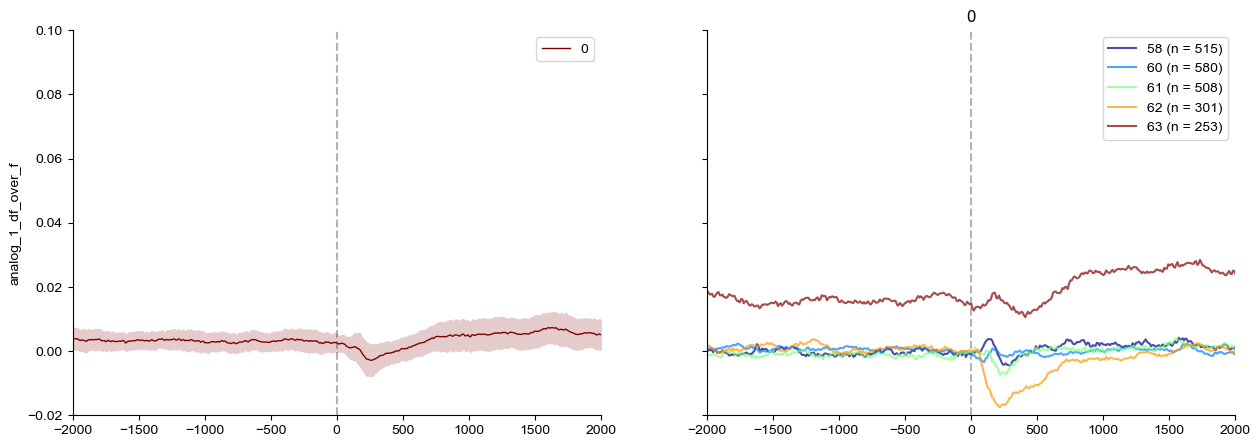

In [9]:
test_photo = exp_cohort.get_photometry_groups(
            groups = None, # or use groups variable defined above
            conditions_list = None, 
            cond_aliases = None,
            trial_window = [-2000, 6000],
            when = 'all', 
            task_names = None,#['reaching_go_spout_nov22','reaching_go_spout_bar_nov22','reaching_go_spout_incr_break2_nov22'],
            trig_on_ev = None, # align to the first event of a kind e.g. bar_off
            last_before = None,
            high_pass = None, 
            low_pass = 45, 
            median_filt = 3,
            motion_corr = True, 
            df_over_f = True, 
            downsampling_factor = 10, 
            export_vars = ['analog_1_df_over_f'], 
            # remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
            verbose = True) # will plot all the process of remove_artifacts if remove_artifacts == True

test_photo.lineplot(
        vars = ['analog_1_df_over_f'],
        time_lim = [-2000, 2000],
        # time_unit = 'seconds',
        ylim = [[-0.02, 0.10]],# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
        error = True,
        colormap = 'jet',
        legend = True,
        plot_subjects = True,
        plot_groups = True,
        liney0 = False,
        linex0 = True,
        figsize = (15, 5),
        dpi = 100,
        verbose = True)

### Conditions for delayed go

In [9]:
# Defime each trial type as a dictionary of conditions to be met
# Defime each trial type as a dictionary of conditions to be met
conditions_dict1 = {'trigger': 'hold_for_water', 'success': True, 'valid': True, 
    'hold_timer': True, 'water by bar_off': False, 'water for free': False} 
conditions_dict2 = {'trigger': 'hold_for_water', 'valid': True, 'hold_timer': False,
    'break_after_abort': True, 'US_end_timer': False, 'success': False, 'button_press': False}

# conditions_dict2 = {'trigger': 'hold_for_water', 'spout':False, 'valid': True, 'busy_win_timer': False, 'button_press': False}

# Aggregate all condition dictionaries in a list
condition_list = [conditions_dict1, conditions_dict2]
# Aliases for conditions
cond_aliases = ['Go - hold', 'Go - aborted']
# Groups as a list of lists
# groups = [[280, 281, 282, 289],[295, 282, 284, 285, 292, 297]]
groups = None

# Window to exctract (in ms)


In [10]:
ev_dataset = exp_cohort.behav_events_to_dataset(
        groups = groups,
        conditions_list = None, 
        cond_aliases = None, 
        when = 'all', 
        task_names = ['reaching_go_spout_bar_nov22' ,'reaching_go_spout_incr_break2_nov22' ], #'reaching_go_spout_bar_dual_all_reward_dec22'], #'pavlovian_nobar_nodelay', #'reaching_go_nogo',
        trig_on_ev = None)

ev_dataset.set_trial_window(trial_window=[-1000,4000], unit='milliseconds')
# ev_dataset.set_conditions(conditions=condition_list, aliases=cond_aliases)

In [14]:
ev_dataset.data

timestamp                         uid  \
0          2001    58_2023-02-06_10:41:32_1   
1          8682    58_2023-02-06_10:41:32_2   
2         18509    58_2023-02-06_10:41:32_3   
3         27628    58_2023-02-06_10:41:32_4   
4         35806    58_2023-02-06_10:41:32_5   
...         ...                         ...   
4029    2320932  63_2023-02-08_14:48:36_130   
4030    2339262  63_2023-02-08_14:48:36_131   
4031    2357431  63_2023-02-08_14:48:36_132   
4032    2376374  63_2023-02-08_14:48:36_133   
4033    2394453  63_2023-02-08_14:48:36_134   

                                         bar_trial_time  \
0                                          [-780, -366]   
1                                                    []   
2                                                    []   
3     [-1306, -1173, -1143, -1123, -1024, -744, -493...   
4                                                    []   
...                                                 ...   
4029                       [232, 281, 6460, 6517, 6588]   
4030                          [-88, -2, 432, 549, 5501]   
4031  [-1575, -346, -142, 700, 4878, 9245, 9274, 976...   
4032  [-584, 1041, 9972, 10192, 10890, 11559, 13038,...   
4033                                          [-666, 0]   

                                     bar_off_trial_time  \
0                                          [-899, -403]   
1                                                    []   
2                                                    []   
3     [-1357, -1188, -1158, -1128, -1108, -813, -580...   
4                                                    []   
...                                                 ...   
4029               [-1611, 247, 1560, 6487, 6557, 6708]   
4030                         [-59, 364, 518, 824, 5517]   
4031  [-1036, -194, 685, 2541, 4894, 9261, 9426, 995...   
4032  [-621, 995, 2108, 10134, 10618, 11359, 12988, ...   
4033                                        [-699, -45]   

                                       spout_trial_time  \
0                                                    []   
1                                                    []   
2                                                    []   
3                                                [4485]   
4     [-1760, -1721, 169, 296, 370, 496, 1120, 1320,...   
...                                                 ...   
4029  [-1350, -461, -119, 2360, 2832, 3345, 3990, 51...   
4030  [-1371, -986, -792, -762, -732, -474, 945, 978...   
4031  [-939, -906, -886, -634, -613, 2744, 2764, 279...   
4032  [2262, 2535, 3590, 3844, 3934, 4508, 4550, 595...   
4033                                                 []   

     US_end_timer_trial_time  
0                         []  
1                         []  
2                         []  
3                         []  
4           [390, 516, 1340]  
...                      ...  
4029      [2580, 3053, 3565]  
4030      [1165, 1199, 2024]  
4031      [2964, 2984, 3014]  
4032      [2482, 3811, 4154]  
4033                      []  

[4034 rows x 6 columns]

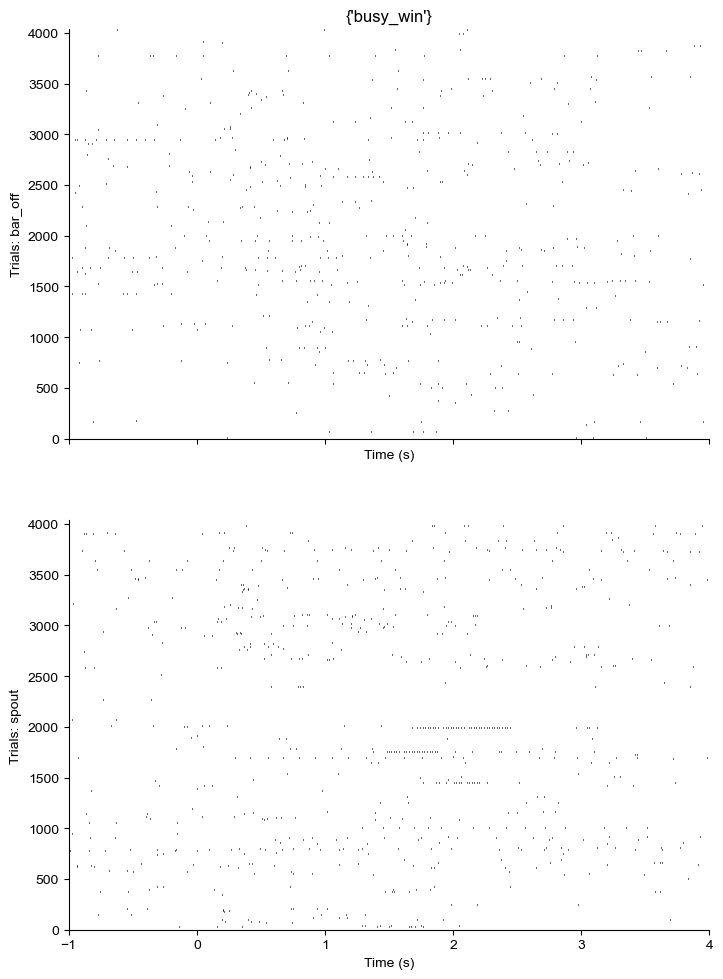

In [11]:
ev_dataset.filter_reset()
# tf = (ev_dataset.get_tfkeep_subjects([316,317,318])) & (ev_dataset.get_tfkeep_dates(date(2022,12,16)))
# tf = (ev_dataset.get_tfkeep_subjects([316,317,318]))
# ev_dataset.set_keep(tf)

ev_dataset.plot_raster(keys=['bar_off_trial_time','spout_trial_time'], module='matplotlib')


Behaviour: Compute distribution

In [15]:
dist_as_continuous = ev_dataset.compute_distribution(
        trial_window = [-1999, 10000],
        bin_size = 100, 
        normalize = True,
        per_session = True,
        out_as_continuous = True)
# dist_as_continuous.set_conditions(conditions=condition_list, aliases=cond_aliases)
# Remove test files
# dist_as_continuous.filterout_subjects([0])

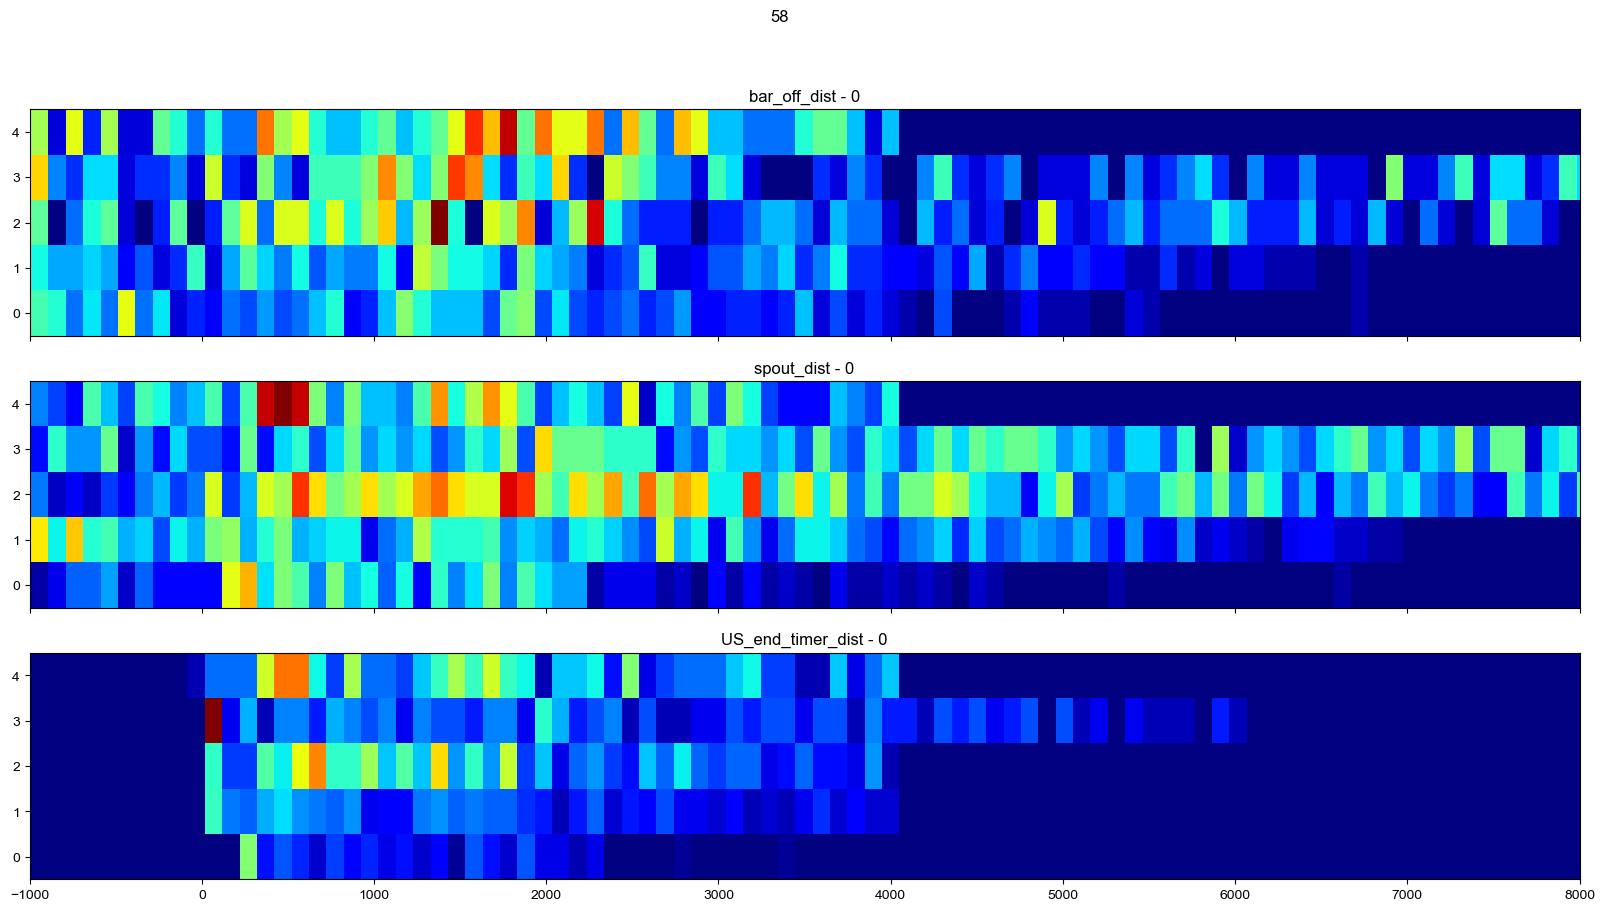

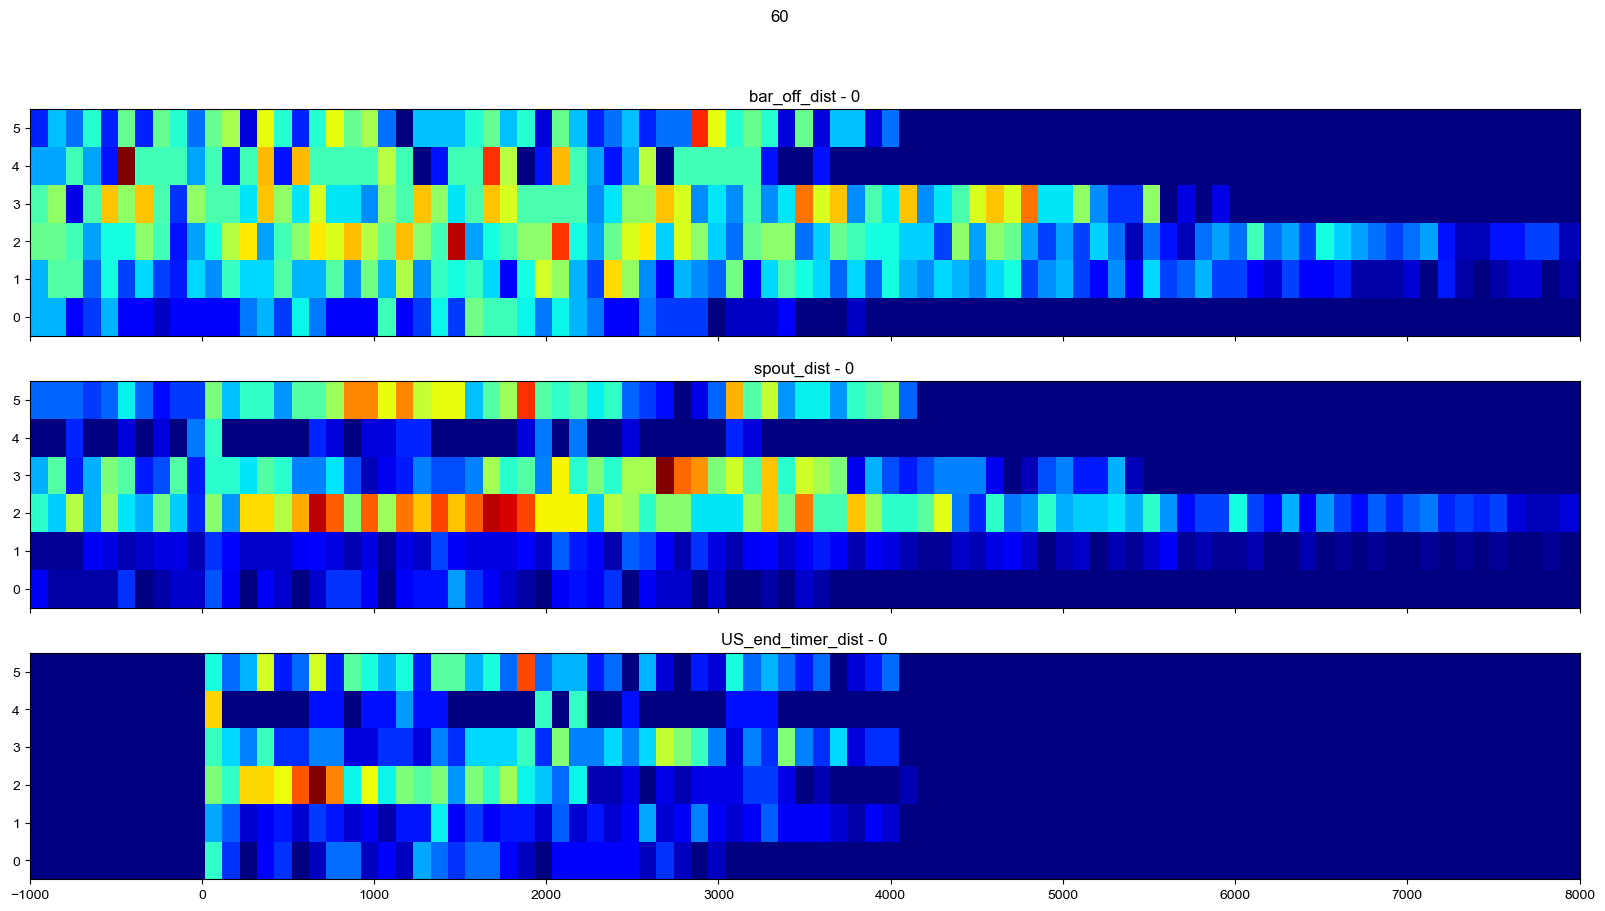

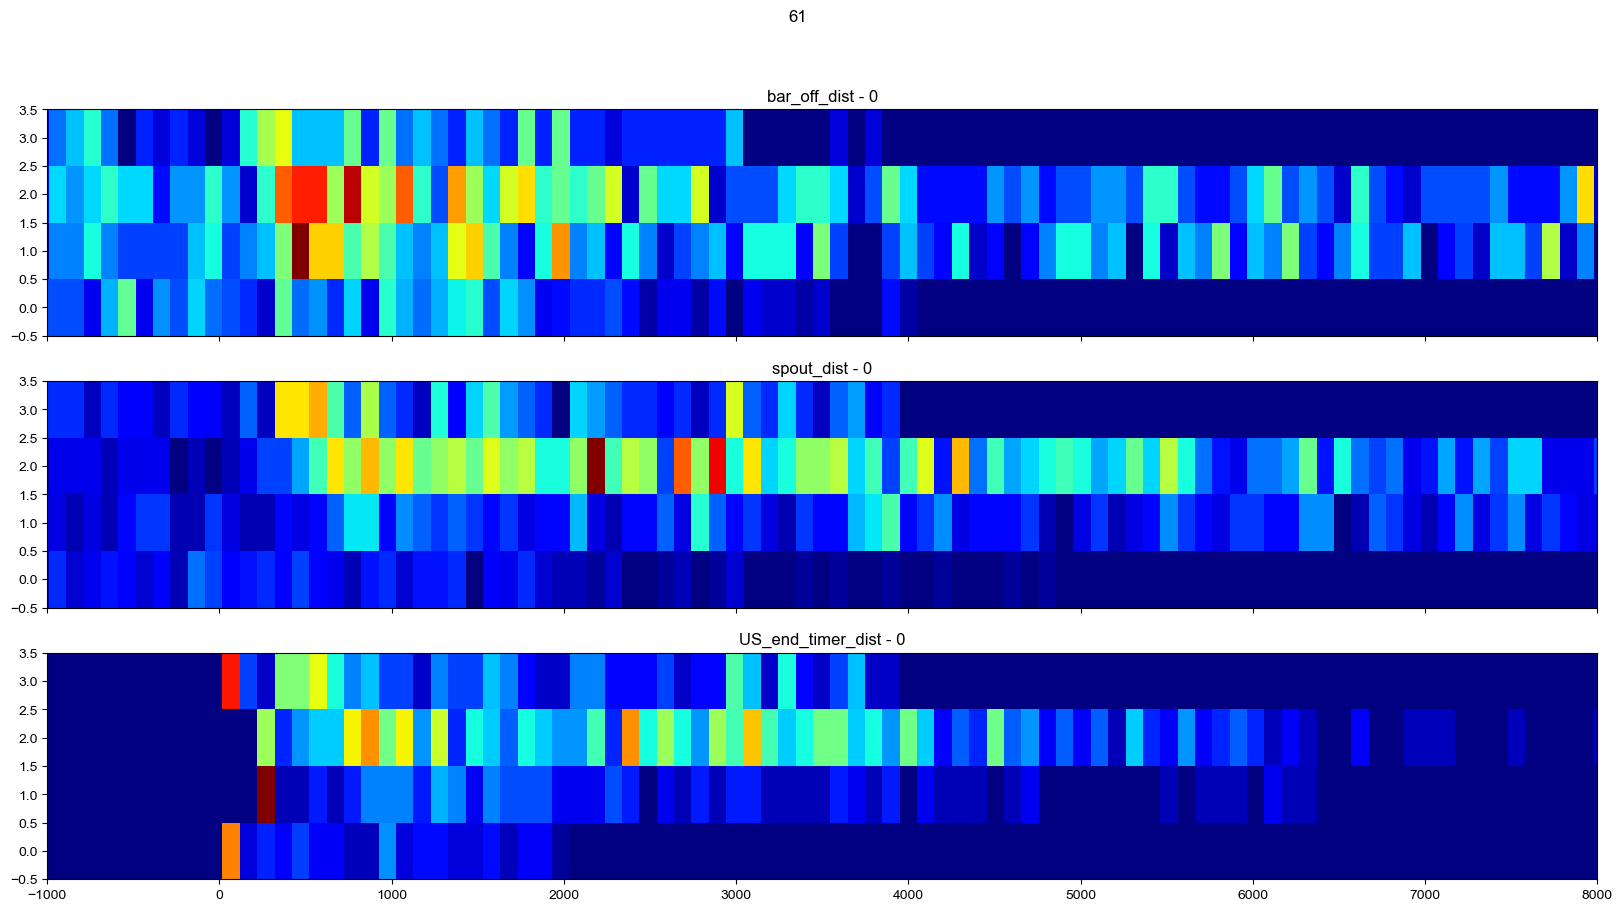

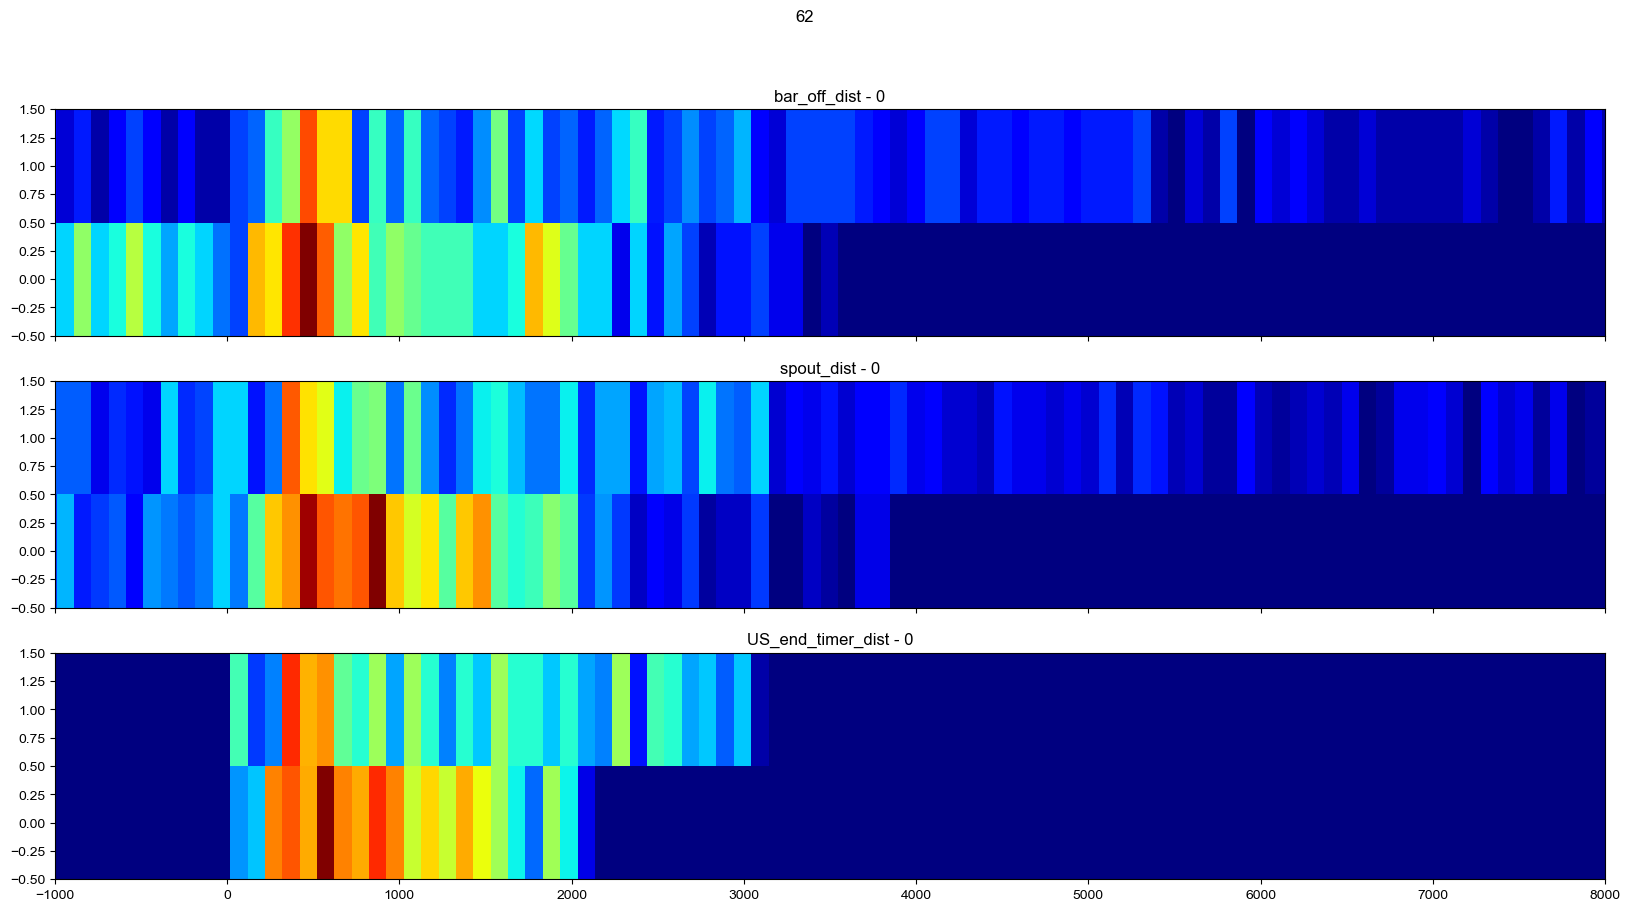

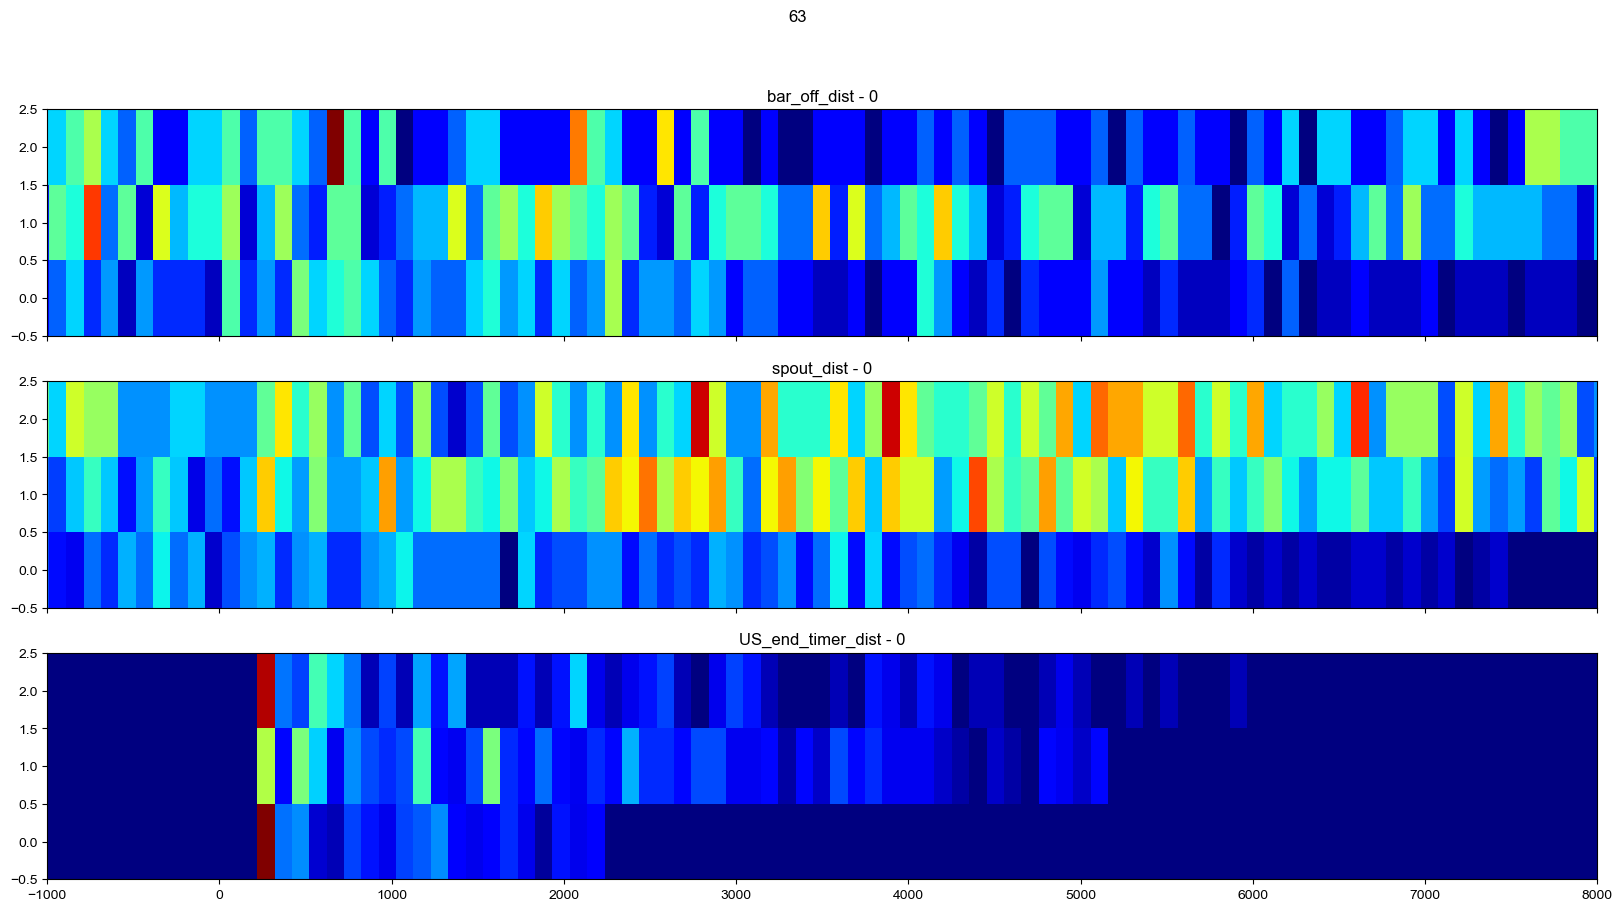

In [16]:
dist_as_continuous.heatmap(
    vars = ['bar_off_dist', 'spout_dist', 'US_end_timer_dist'],
    time_lim = [-1000, 8000],
    colormap = 'jet'
)

### Optional methods

- Implementation of these optional filtering options is first understood as removing subjects, groups, conditions...
- It is a non-permanent way of discarding elements for analysis
- It is based on a "keep" column in the metadata that is True by default and set to False with the filtering function.
- At anytime, <trial_dataset>.filter_reset() can be called to re-include all the elements in the analysis (set all "keep" to True)
- Comment or uncomment lines and fill the lists according to your needs

In [ ]:
# Get a list of the groups
dist_as_continuous.get_groups()
# Get a list of the variables
dist_as_continuous.get_col_names()

# reset previous filtering of the dataset
dist_as_continuous.filter_reset()

# exclude some conditions by IDs
# dist_as_continuous.filter_out_conditions([])

# # exclude some groups by IDs
# dist_as_continuous.filter_out_groups([])

# exclude some subjects
dist_as_continuous.filterout_subjects([313,314,315])
#     subjects_IDs_to_exclude = [289, 290, 293, 294, 295, 299, 301, 303, 304, 305, 306])
# dist_as_continuous.filter_lastNsessions(3)
# dist_as_continuous.filterout_dates([])

# filter subjects/sessions with less than x trials (by condition)
# dist_as_continuous.filter_min(min_trials = 1)

# To remove subjects who do not have trials
# in all the conditions, if called after filter_min(),
# will discard any subject who do not have the minimum number
# of trials in all the conditions

# dist_as_continuous.filter_if_not_in_all_cond()


Behaviour: Plot distribution

True    20
Name: keep, dtype: int64

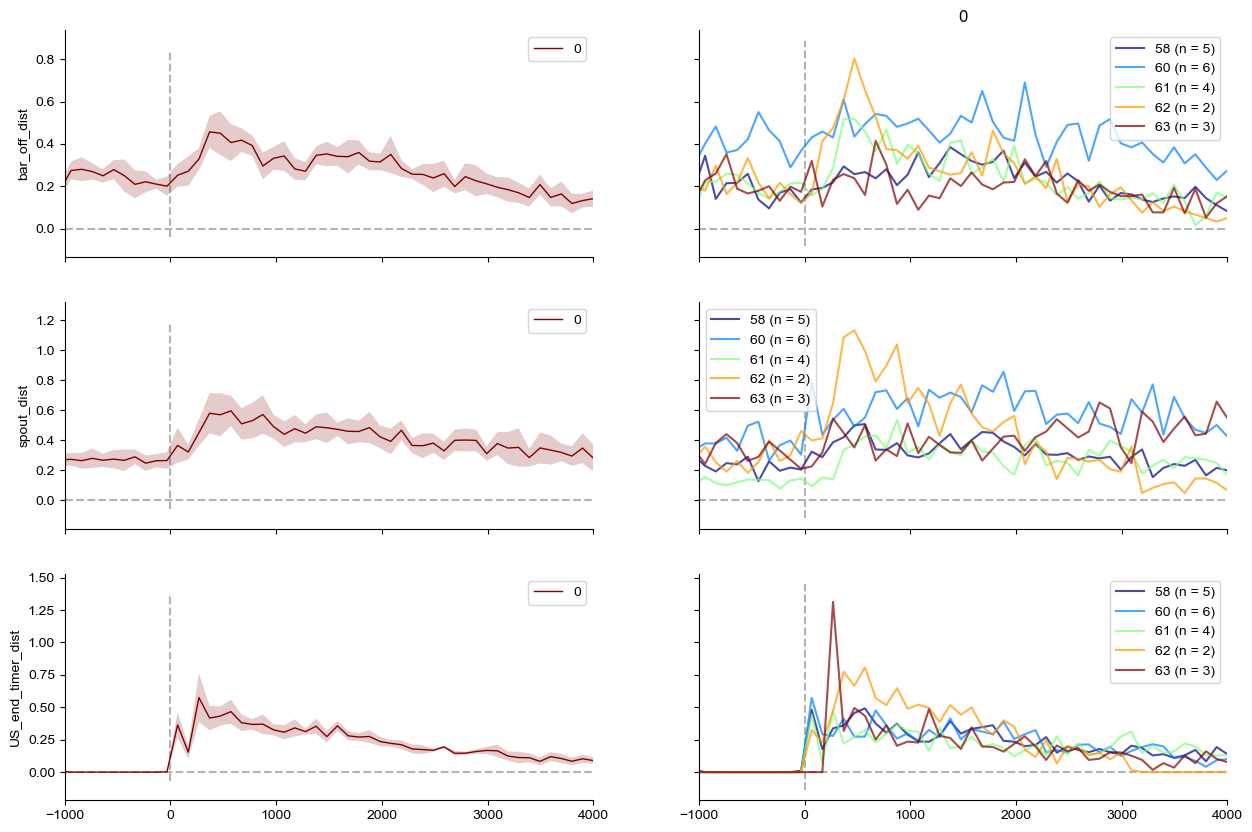

In [18]:
dist_as_continuous.filter_reset()
# dist_as_continuous.filter_lastNsessions(n = 5)
dist_as_continuous.lineplot(
    vars = [ 'bar_off_dist','spout_dist','US_end_timer_dist'],
    time_lim = [-1000,4000],
    error = True,
    ylim = None,#[[-0.1,1.6]], #[[-0.1, 0.7]], #[[-0.1, 1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    colormap = 'jet',
    legend = True,
    plot_subjects = True,
    plot_groups = True,
    figsize = (15,10),
    dpi = 100,
    verbose = False)
# Return a count of overall number of trials
dist_as_continuous.metadata_df['keep'].value_counts()


Loop to plot photometry trials triggered on different events
- 1: Trial onset (CS-onset = hold period start)
- 2: First bar_off
- 3: Last bar_off before spout
- 4: First spout
- 5: Reward (US_end_timer)

In [1]:

trigs = [None, 'bar_off', 'bar_off', 'spout', 'US_end_timer']
last_befores = [None, None, 'spout', None, None]

photo_dataset = dict()
for idx, trig in enumerate(trigs):
    photo_dataset[idx] = exp_cohort.get_photometry_groups(
            groups = None, # or use groups variable defined above
            conditions_list = None, 
            cond_aliases = None,
            trial_window = trial_window,
            when = '[2023-10-07]', 
            task_names = ['reaching_go_spout_nov22','reaching_go_spout_bar_nov22','reaching_go_spout_incr_break2_nov22'],
            trig_on_ev = trig, # align to the first event of a kind e.g. bar_off
            last_before = last_befores[idx],
            high_pass = None, 
            low_pass = 45, 
            median_filt = 3,
            motion_corr = True, 
            df_over_f = True, 
            downsampling_factor = 10, 
            export_vars = ['analog_1_df_over_f'], 
            # remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
            verbose = True) # will plot all the process of remove_artifacts if remove_artifacts == True



NameError: name 'exp_cohort' is not defined

Plot photometry trials triggered on different events based on above extraction
- 1: Trial onset (CS-onset = hold period start)
- 2: First bar_off
- 3: Last bar_off before spout
- 4: First spout
- 5: Reward (US_end_timer)

cond_ID: 0, group_idx 0, subj 58
cond_ID: 0, group_idx 0, subj 60
cond_ID: 0, group_idx 0, subj 61
cond_ID: 0, group_idx 0, subj 62
cond_ID: 0, group_idx 0, subj 63
cond_ID: 0, group_idx 0, subj 58
cond_ID: 0, group_idx 0, subj 60
cond_ID: 0, group_idx 0, subj 61
cond_ID: 0, group_idx 0, subj 62
cond_ID: 0, group_idx 0, subj 63
cond_ID: 0, group_idx 0, subj 58
cond_ID: 0, group_idx 0, subj 60
cond_ID: 0, group_idx 0, subj 61
cond_ID: 0, group_idx 0, subj 62
cond_ID: 0, group_idx 0, subj 63
cond_ID: 0, group_idx 0, subj 58
cond_ID: 0, group_idx 0, subj 60
cond_ID: 0, group_idx 0, subj 61
cond_ID: 0, group_idx 0, subj 62
cond_ID: 0, group_idx 0, subj 63
cond_ID: 0, group_idx 0, subj 58
cond_ID: 0, group_idx 0, subj 60
cond_ID: 0, group_idx 0, subj 61
cond_ID: 0, group_idx 0, subj 62
cond_ID: 0, group_idx 0, subj 63


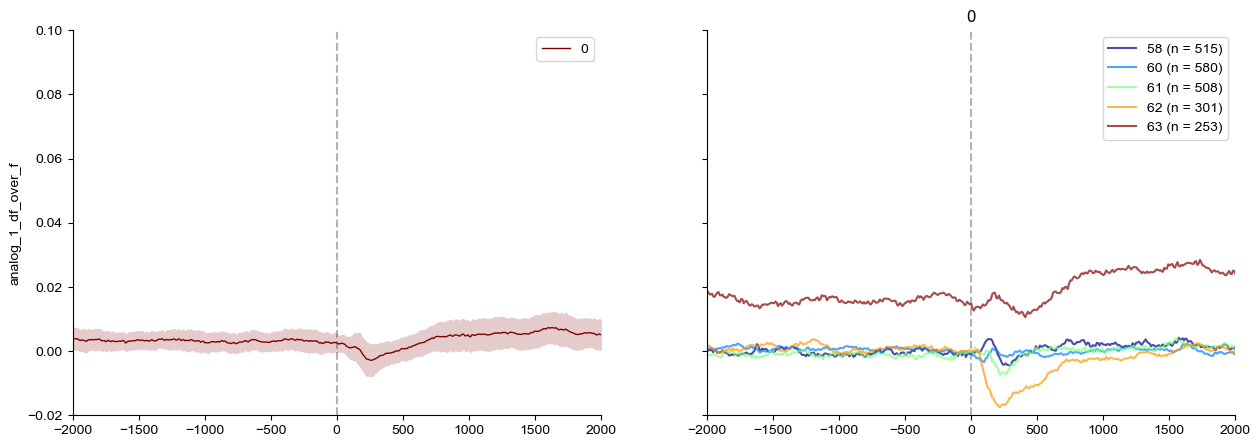

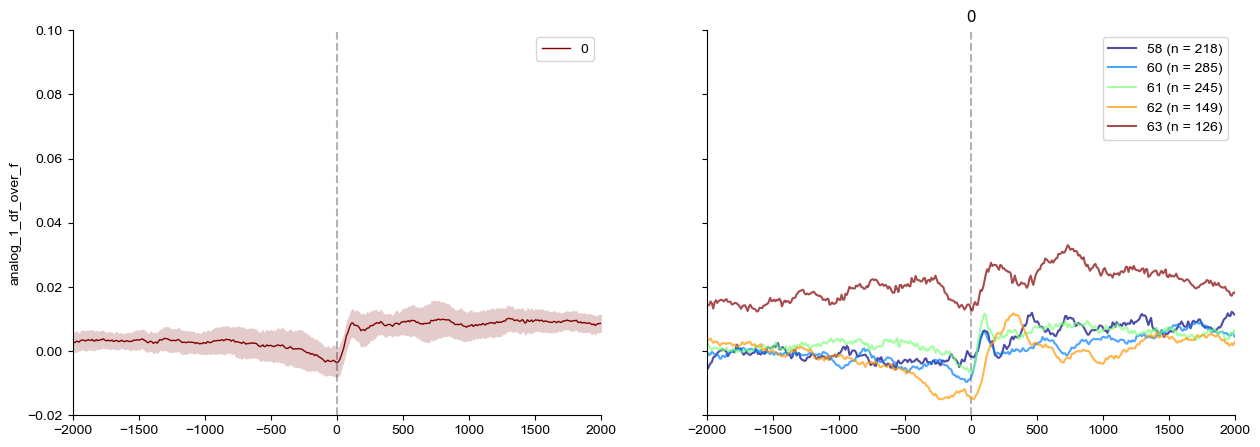

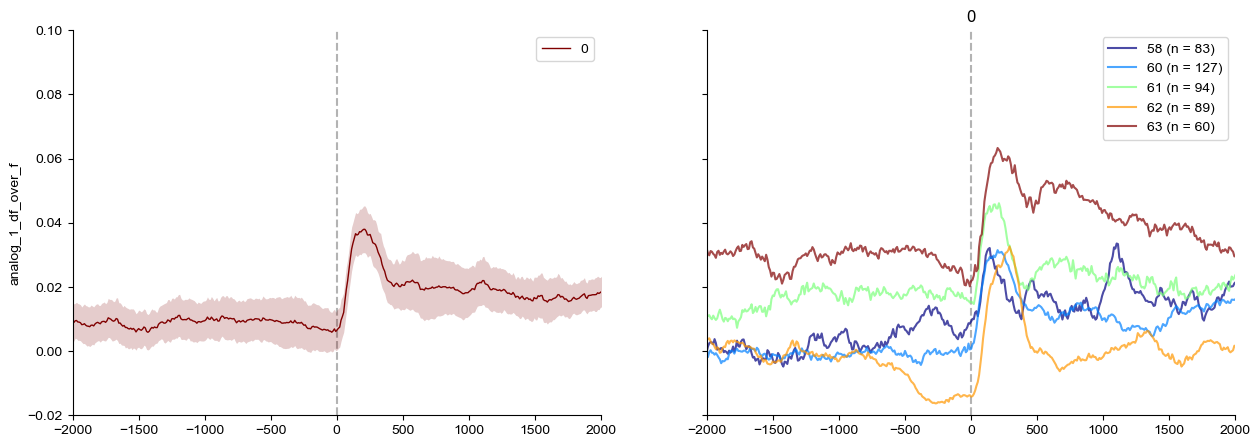

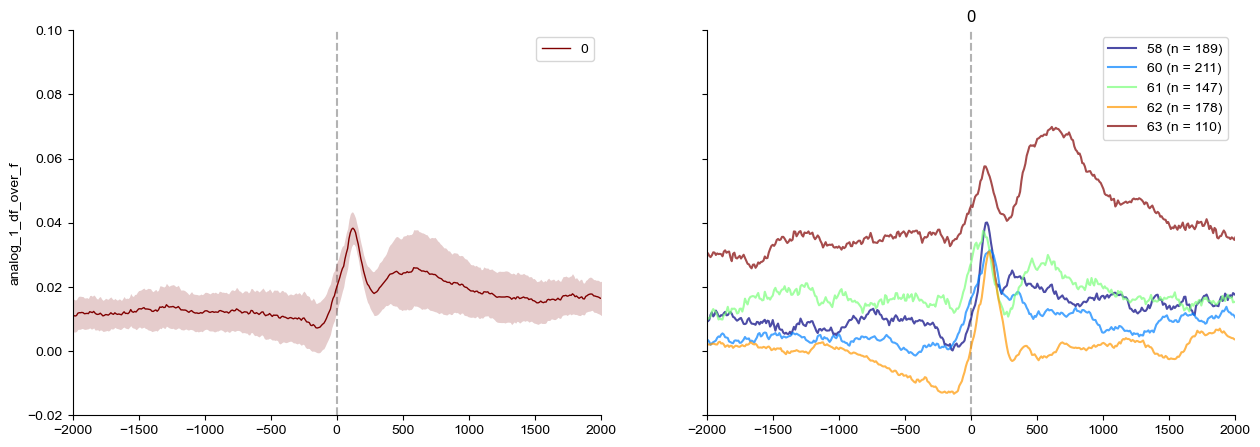

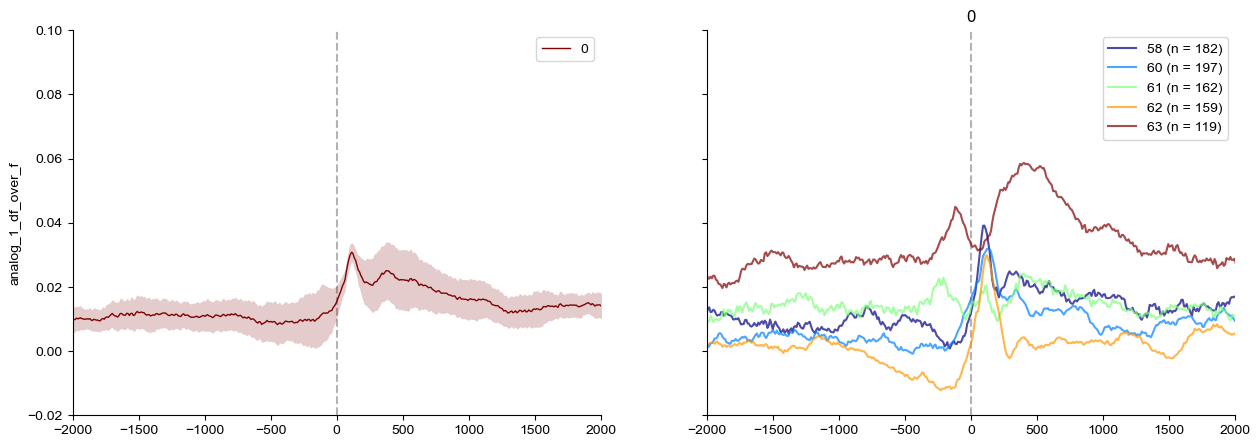

In [21]:

for idx, trig in enumerate(trigs):

    # keep only 316
    photo_dataset[idx].filter_reset()
    photo_dataset[idx].filterout_subjects([0,1,313,314,317,318])
    photo_dataset[idx].filter_min(min_trials = 10)
    # photo_dataset[idx].filter_lastNsessions(n = 5)
    if idx == 4:
        photo_dataset[idx].filterout_conditions(1)
    photo_dataset[idx].lineplot(
        vars = ['analog_1_df_over_f'],
        time_lim = [-2000, 2000],
        # time_unit = 'seconds',
        ylim = [[-0.02, 0.10]],# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
        error = True,
        colormap = 'jet',
        legend = True,
        plot_subjects = True,
        plot_groups = True,
        liney0 = False,
        linex0 = True,
        figsize = (15, 5),
        dpi = 100,
        verbose = True)

Same plot, heatmap version:

- 1: Trial onset (CS-onset = hold period start)
- 2: First bar_off
- 3: Last bar_off before spout
- 4: First spout
- 5: Reward (US_end_timer)

c:\users\phar0732\documents\github\trialexp\trialexp\dataset_classes\trial_dataset_classes.py:1274: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


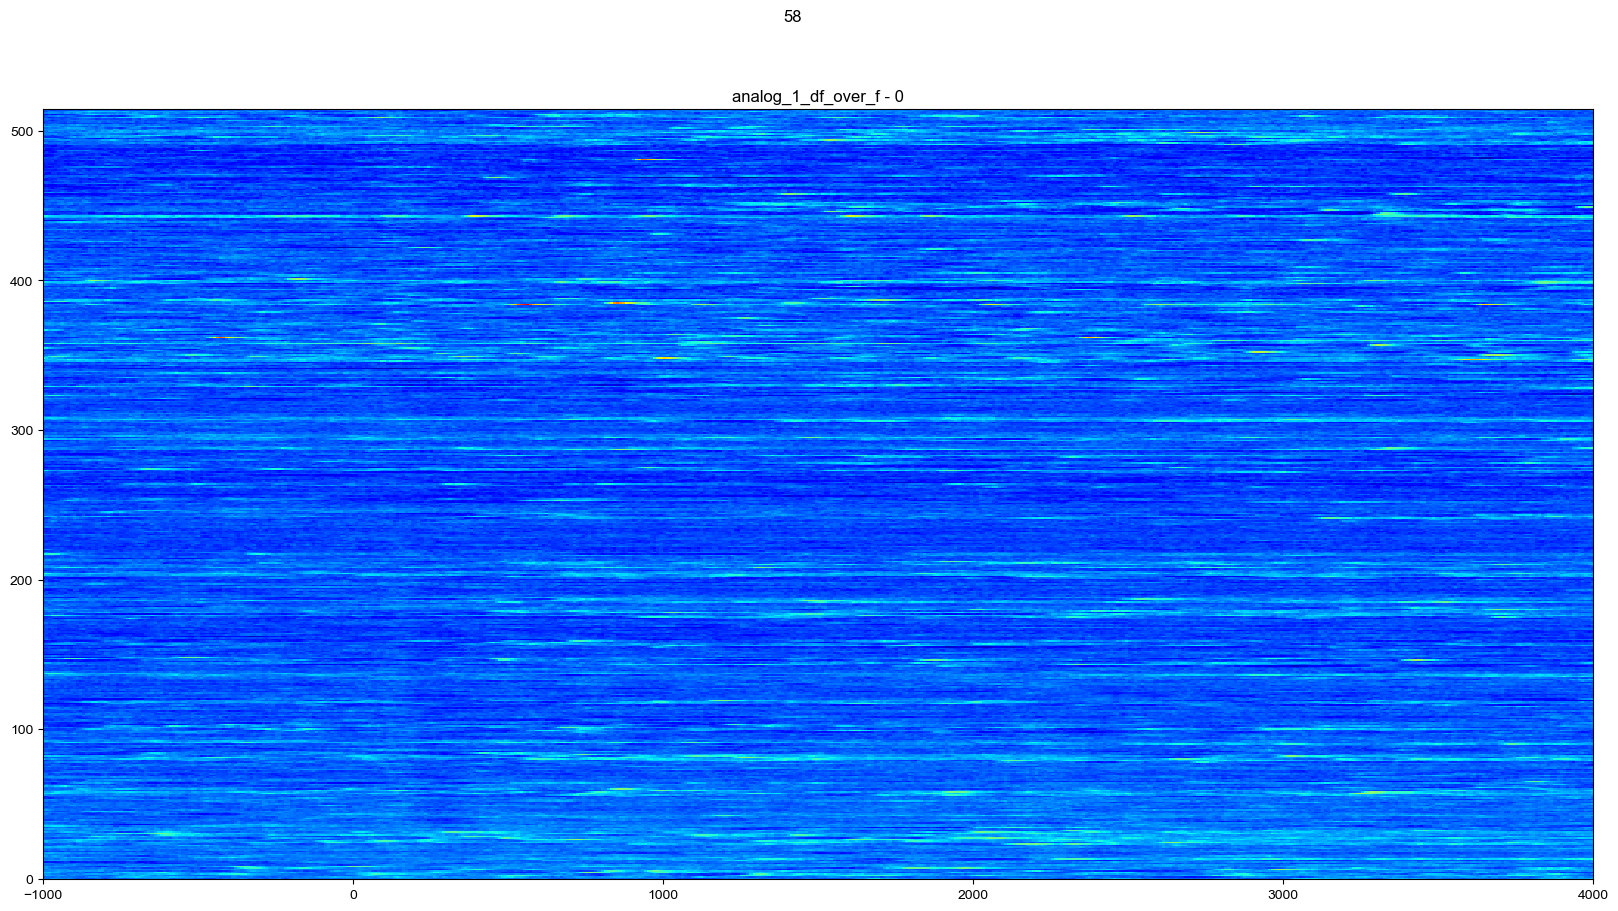

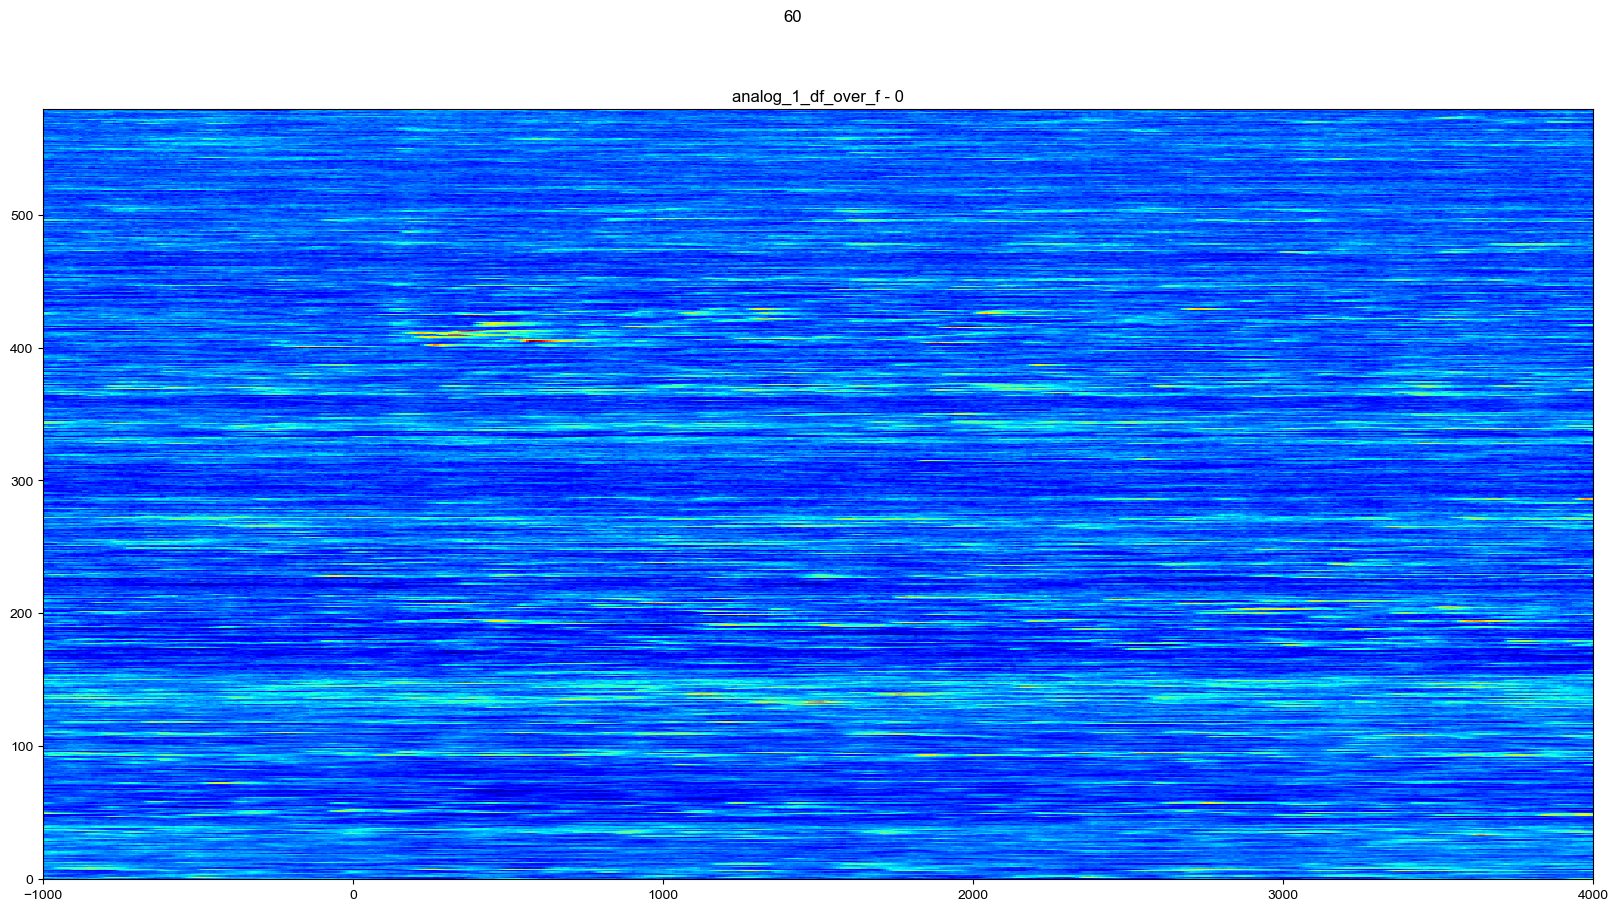

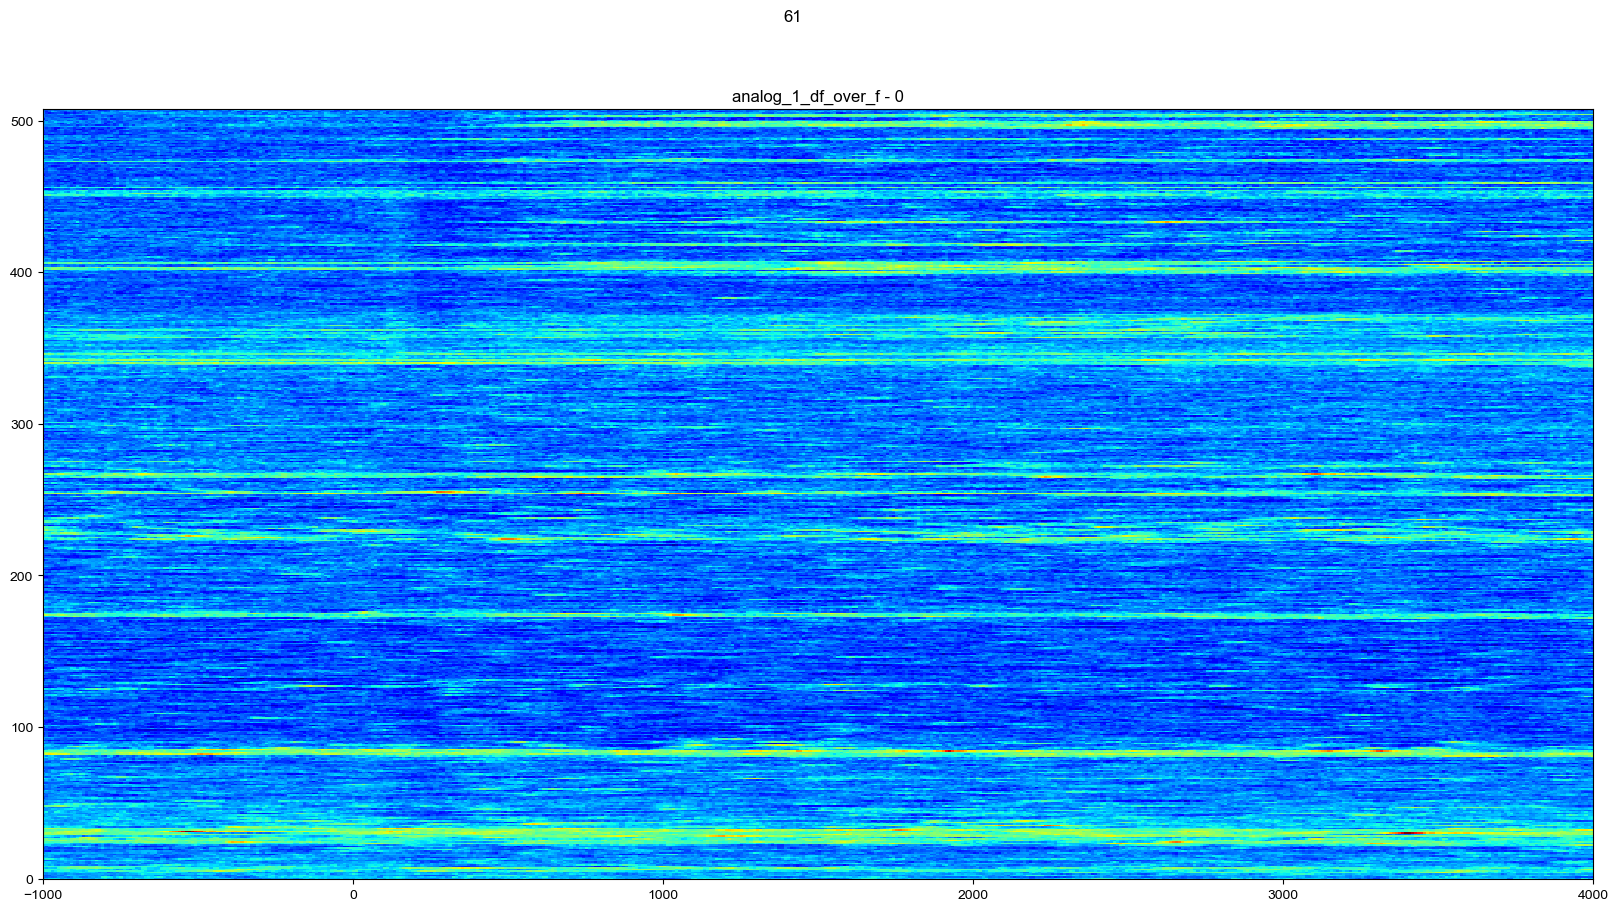

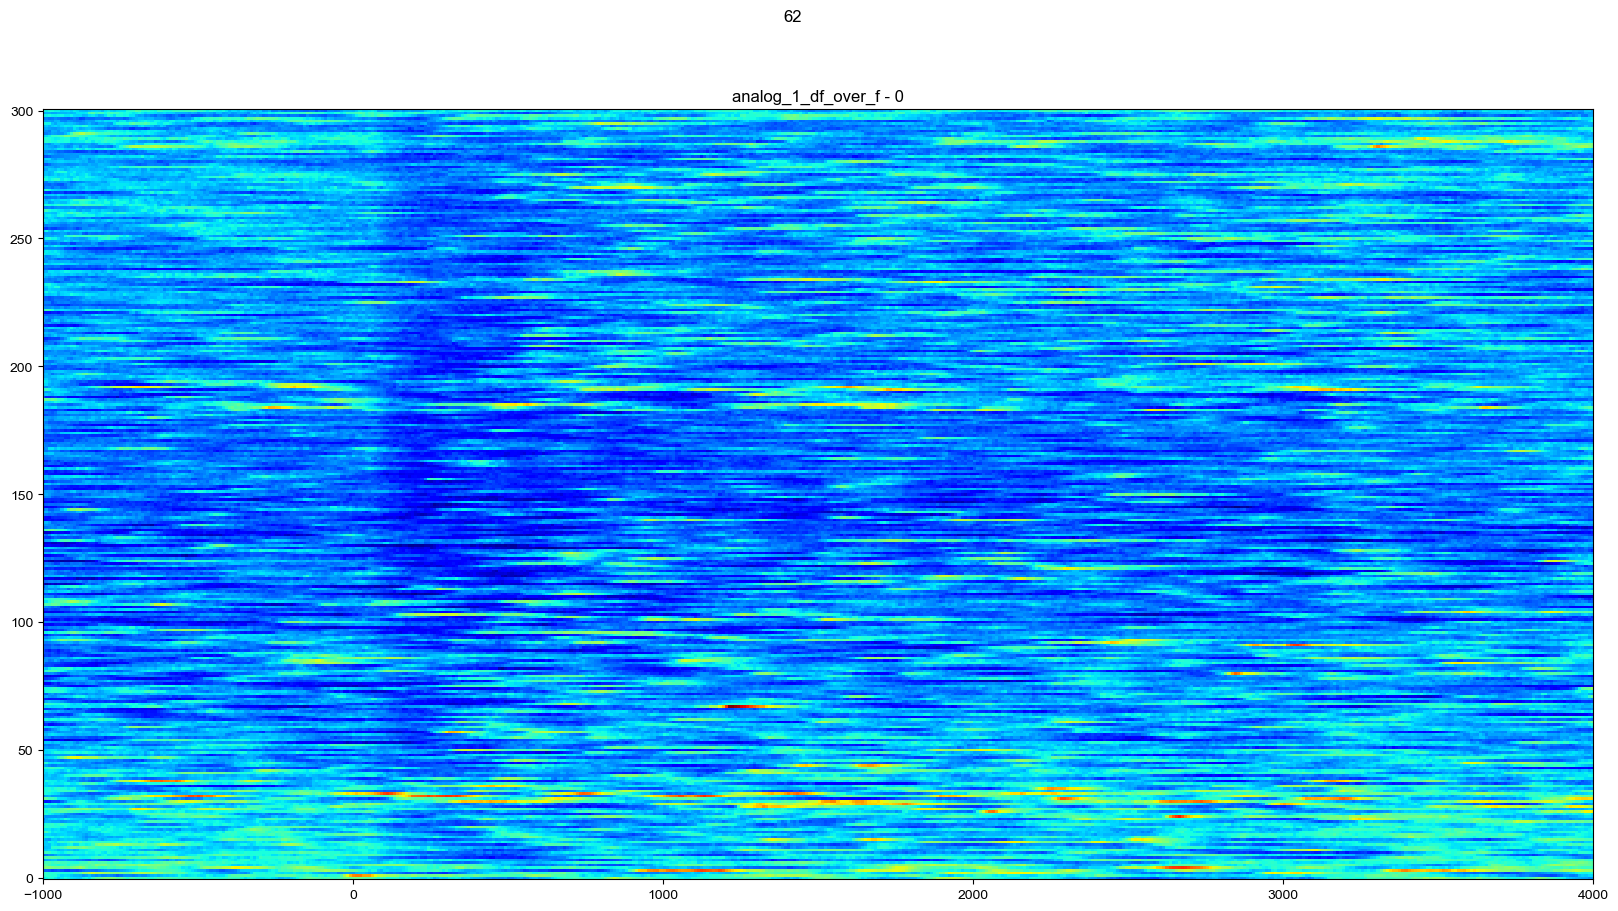

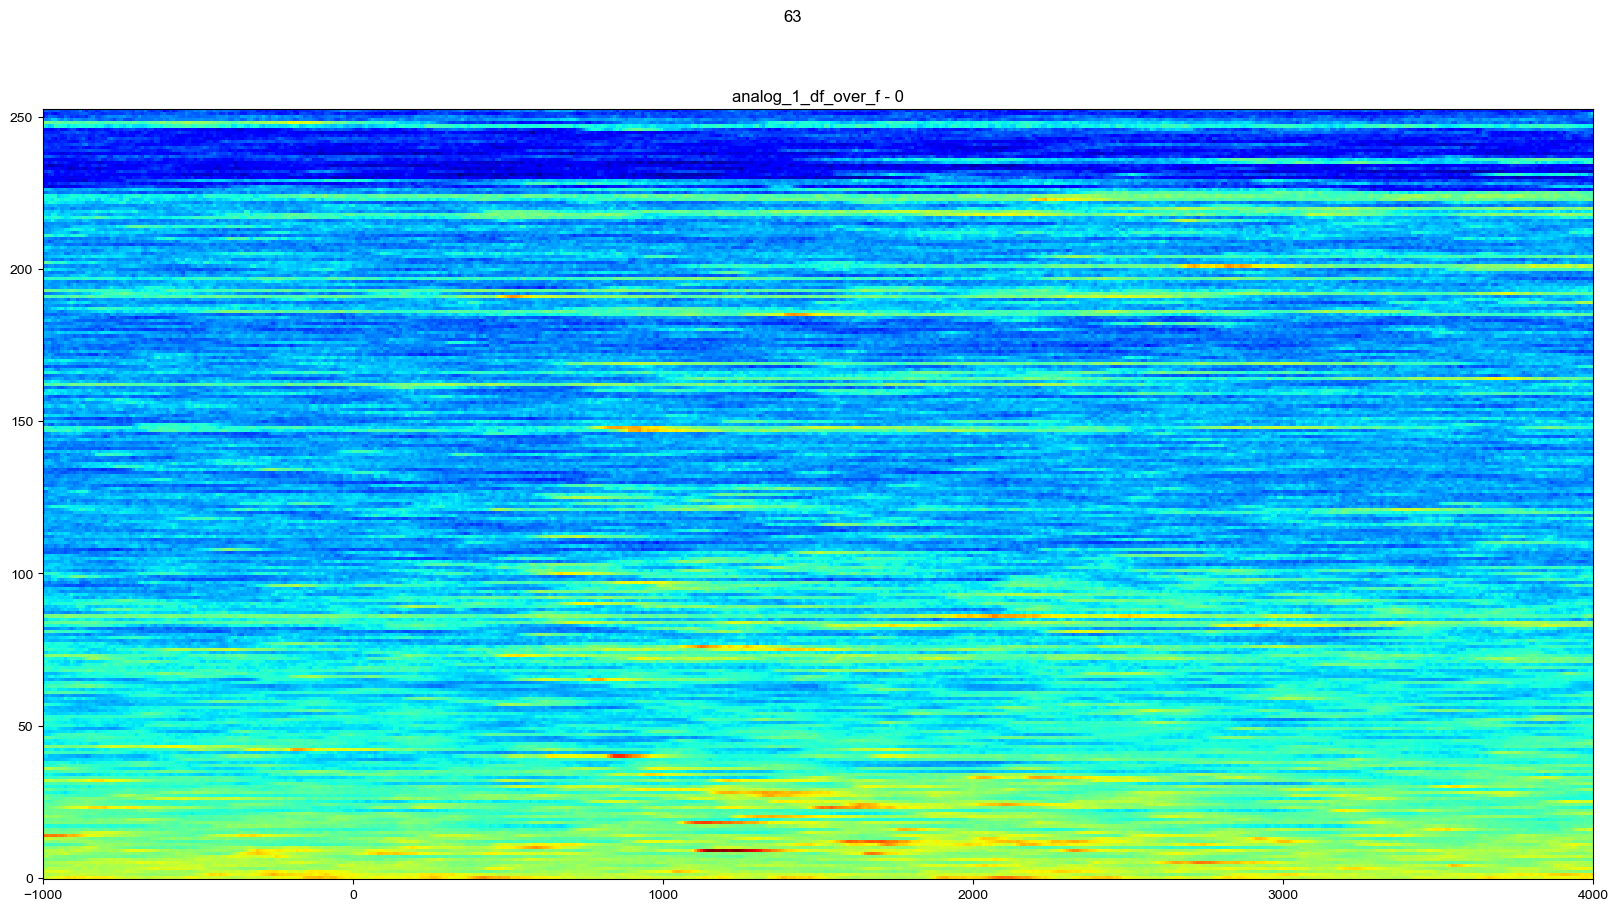

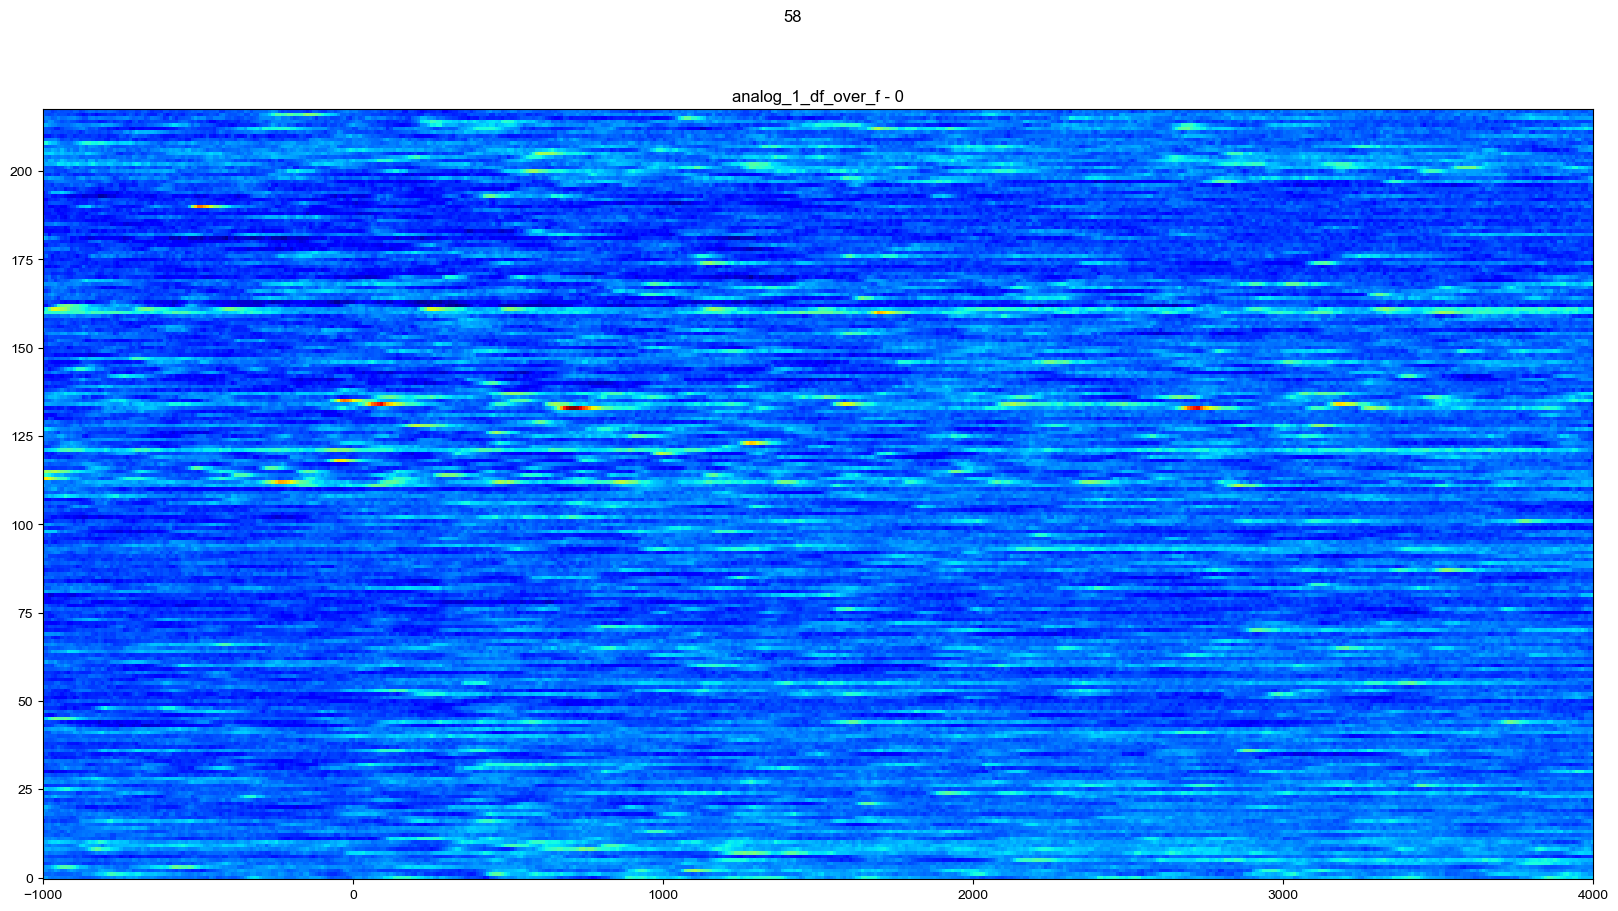

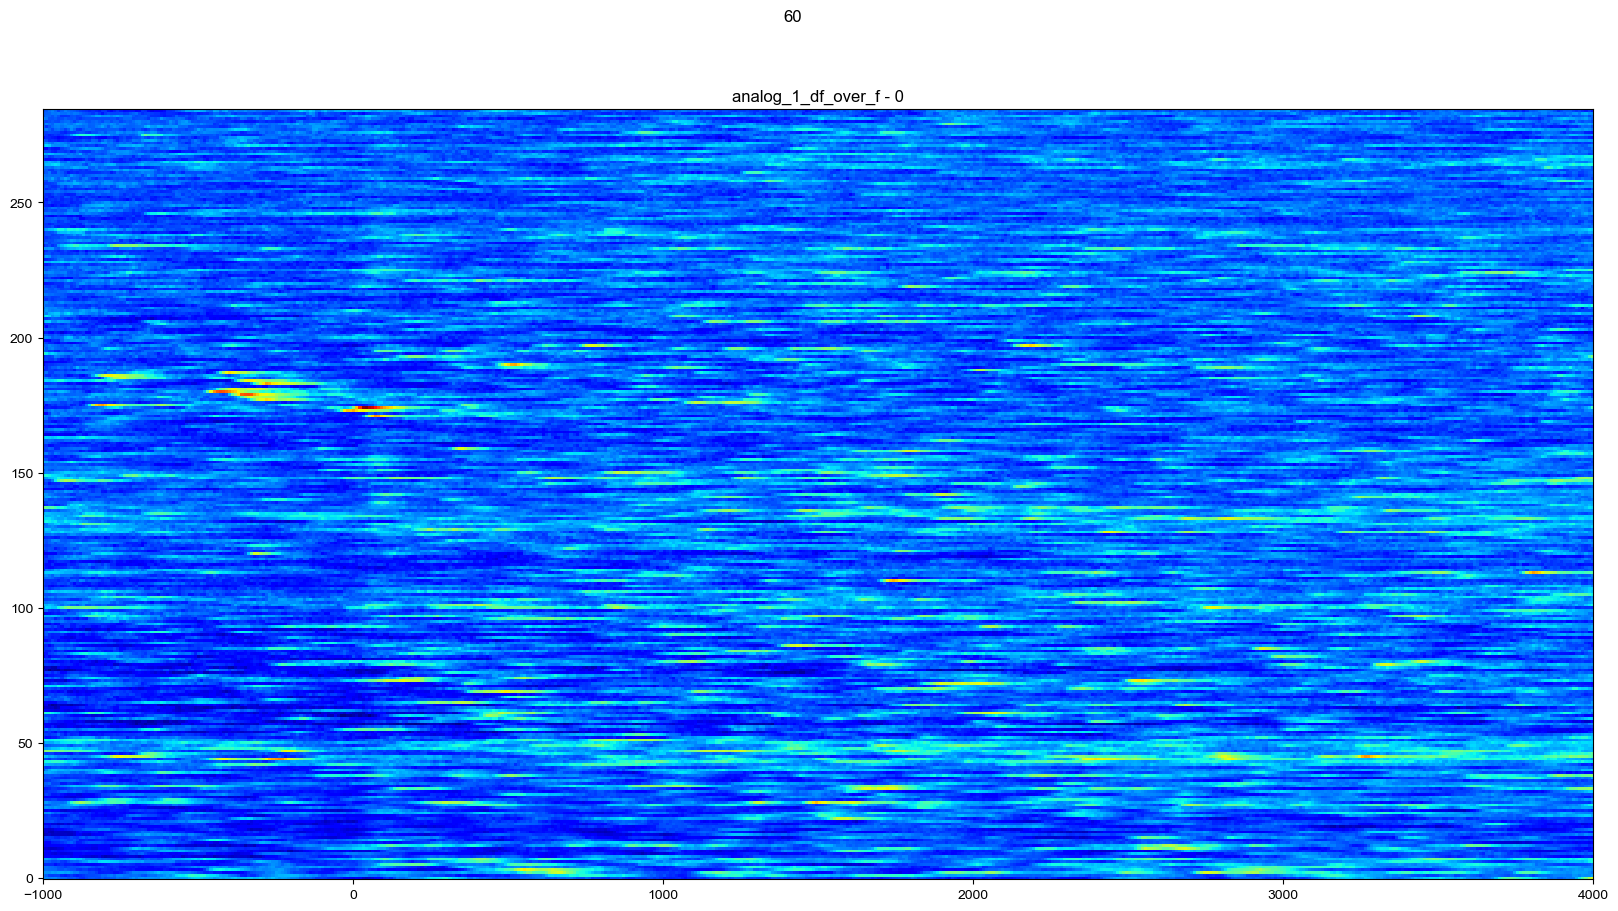

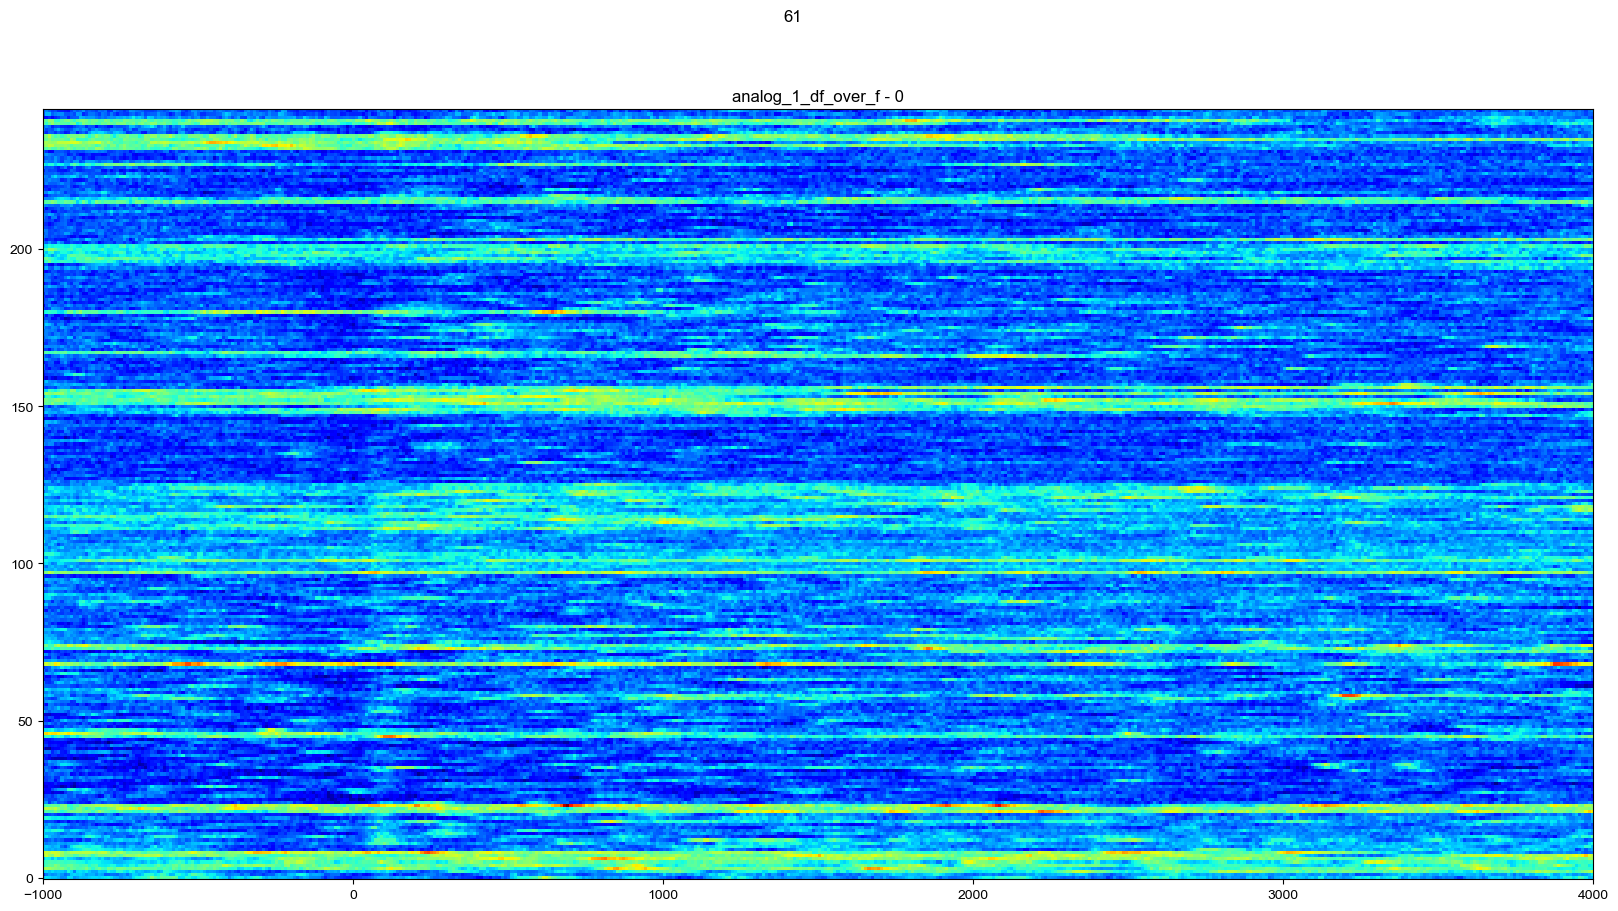

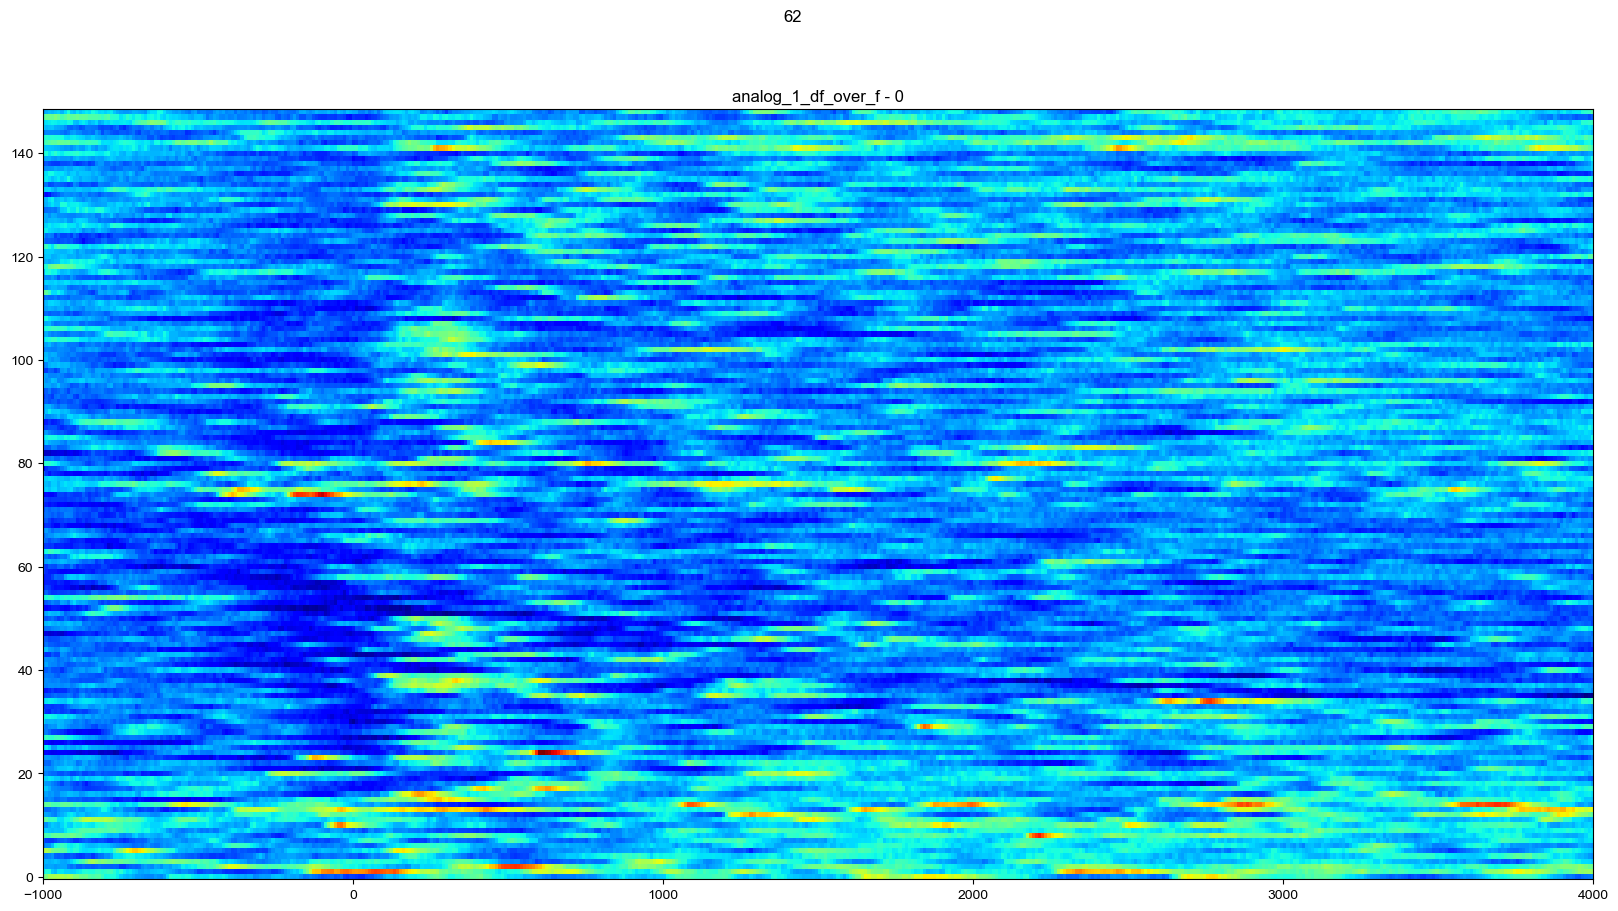

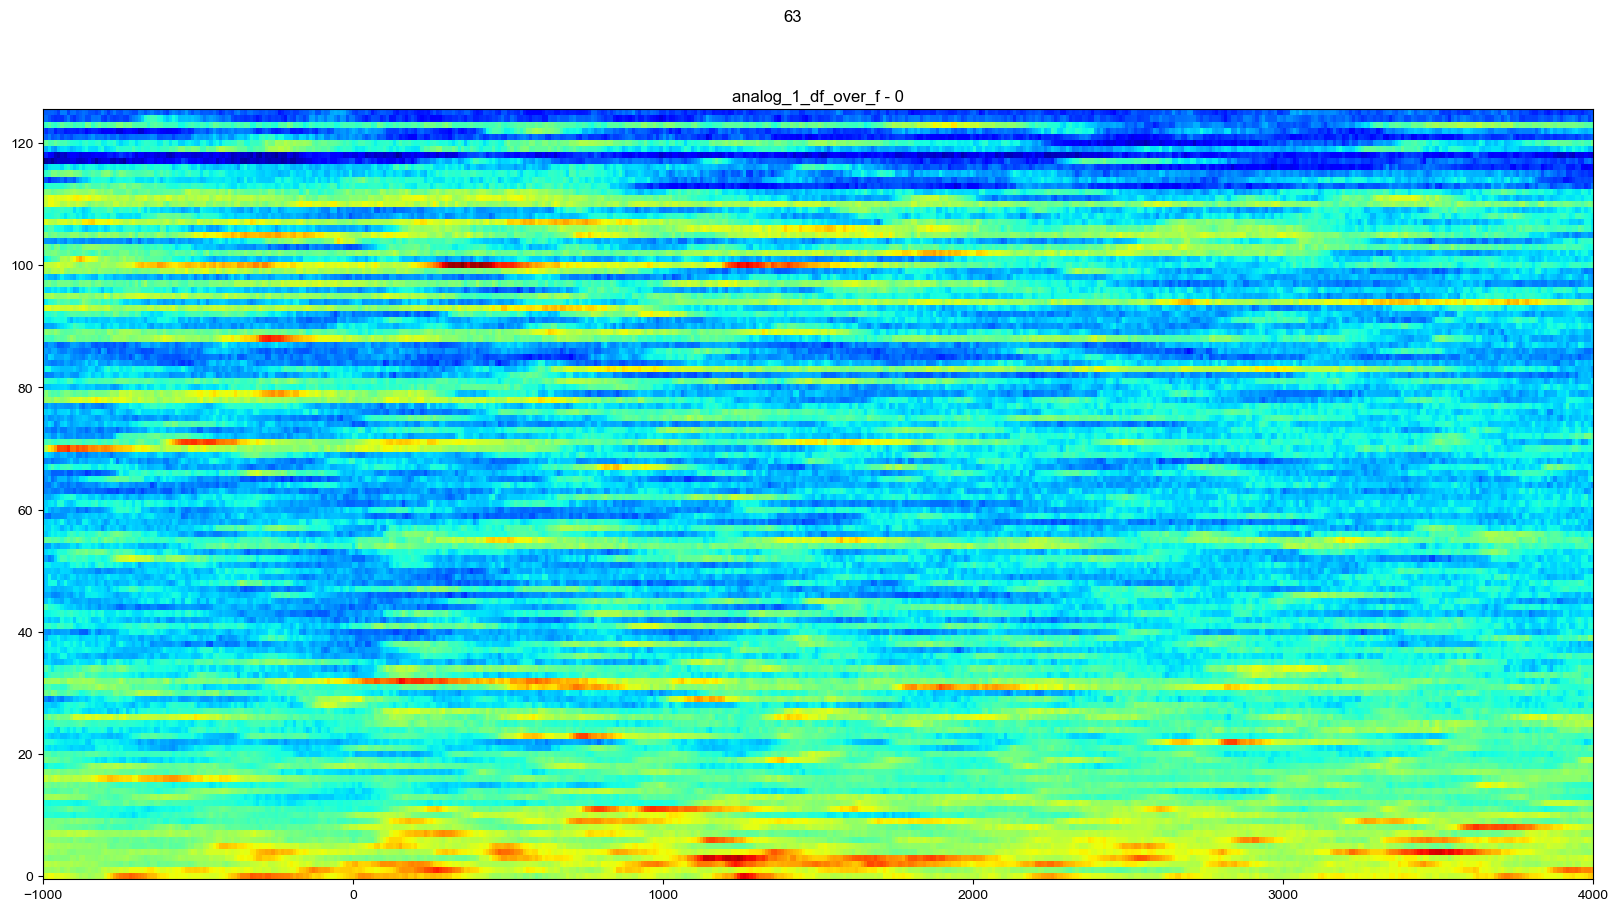

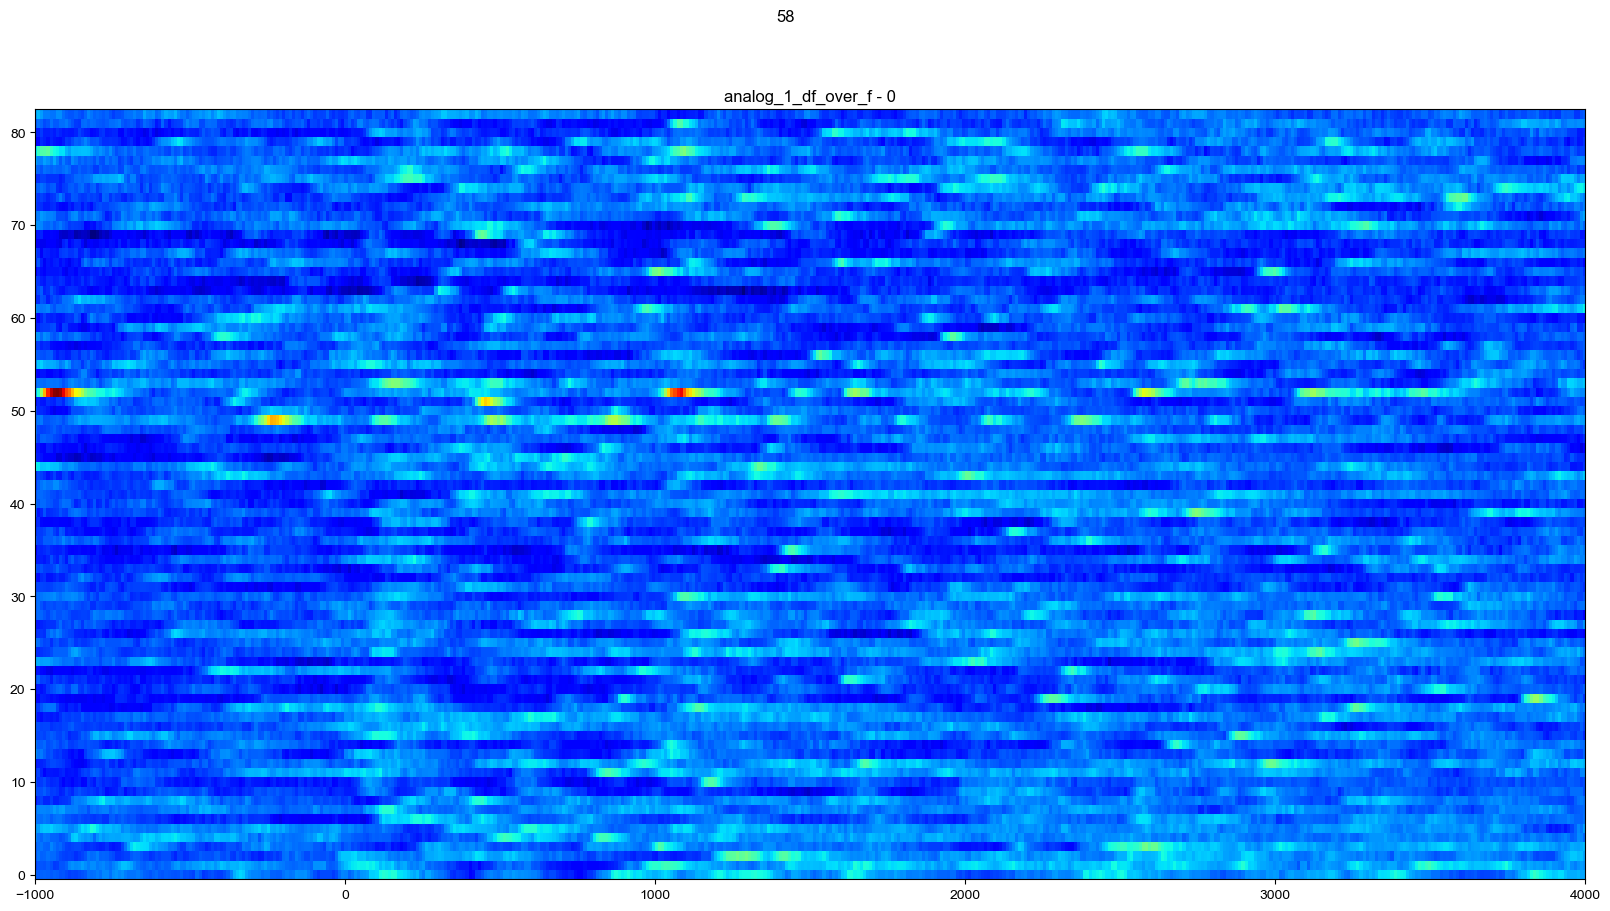

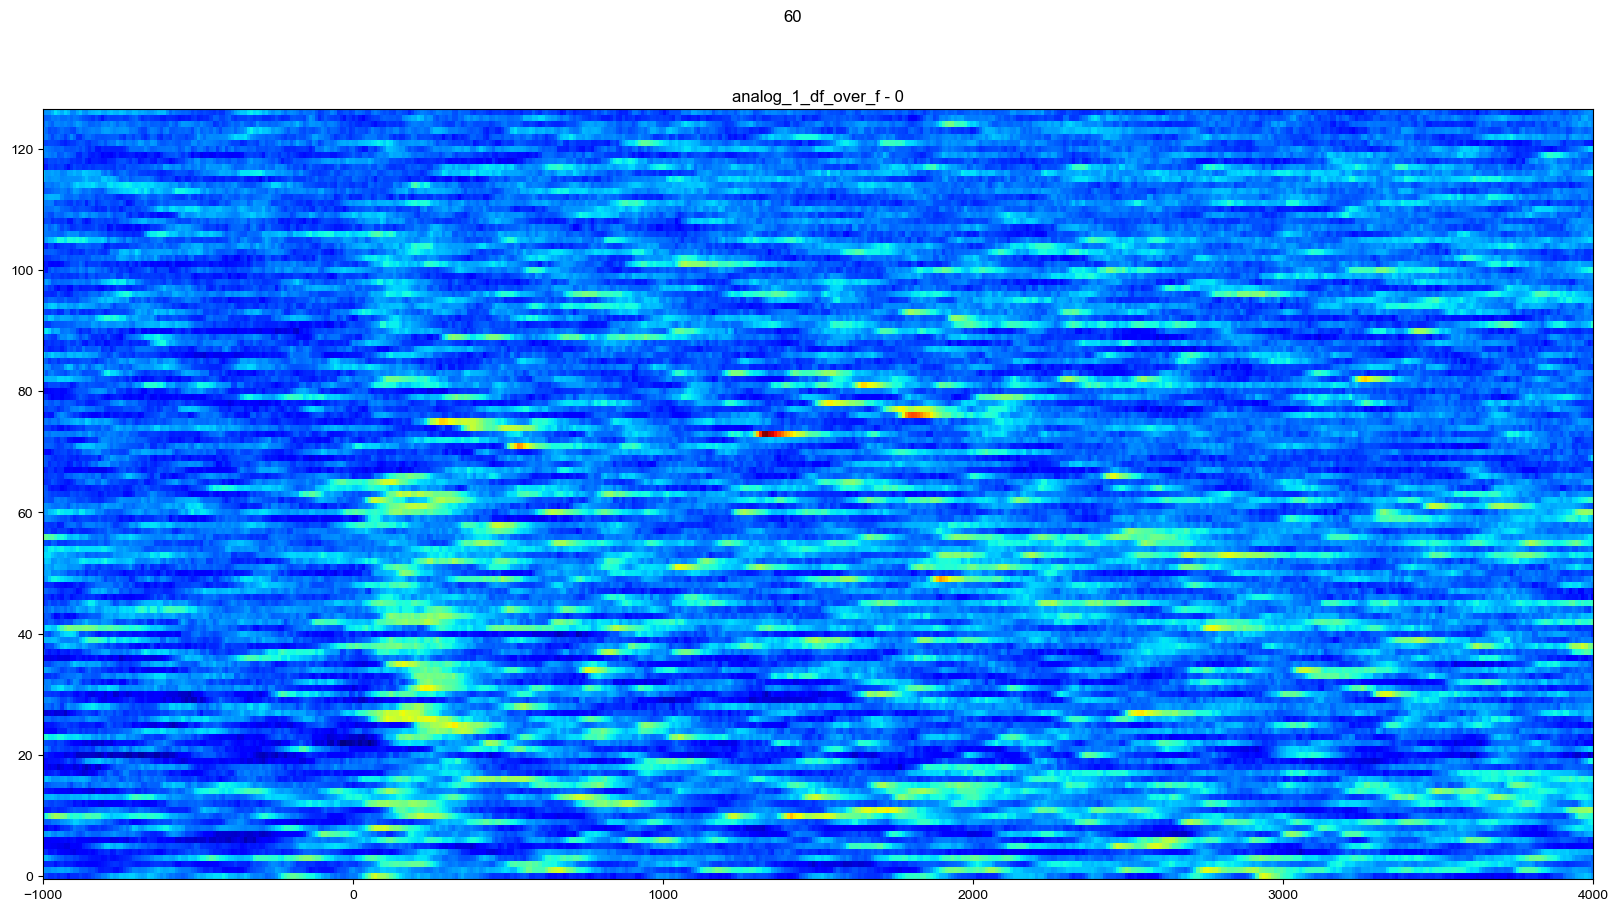

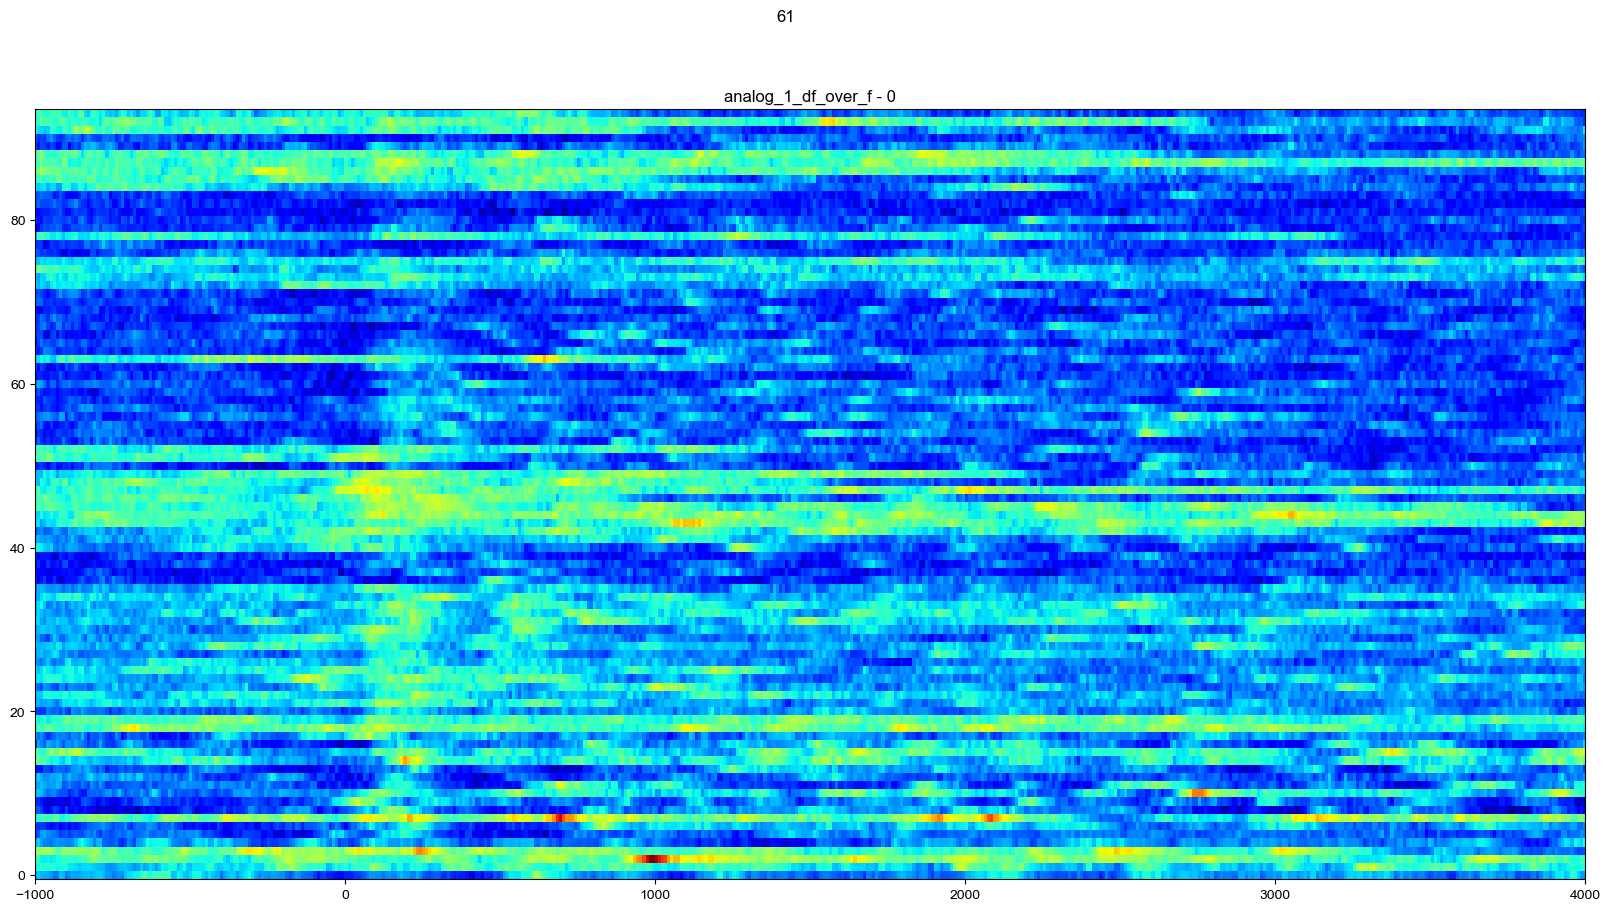

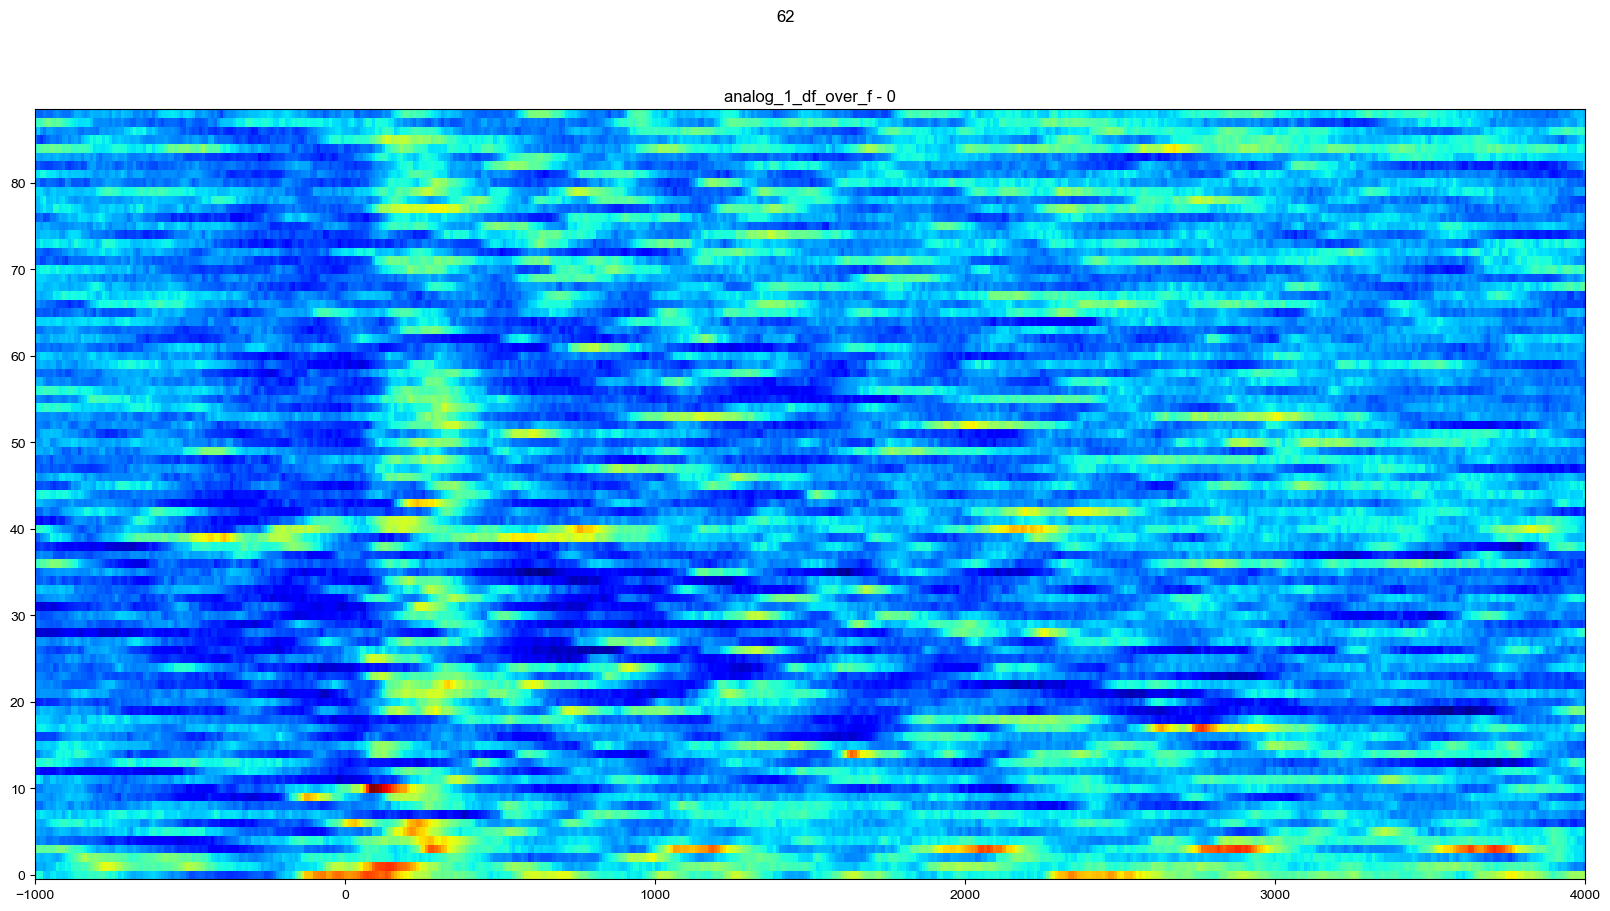

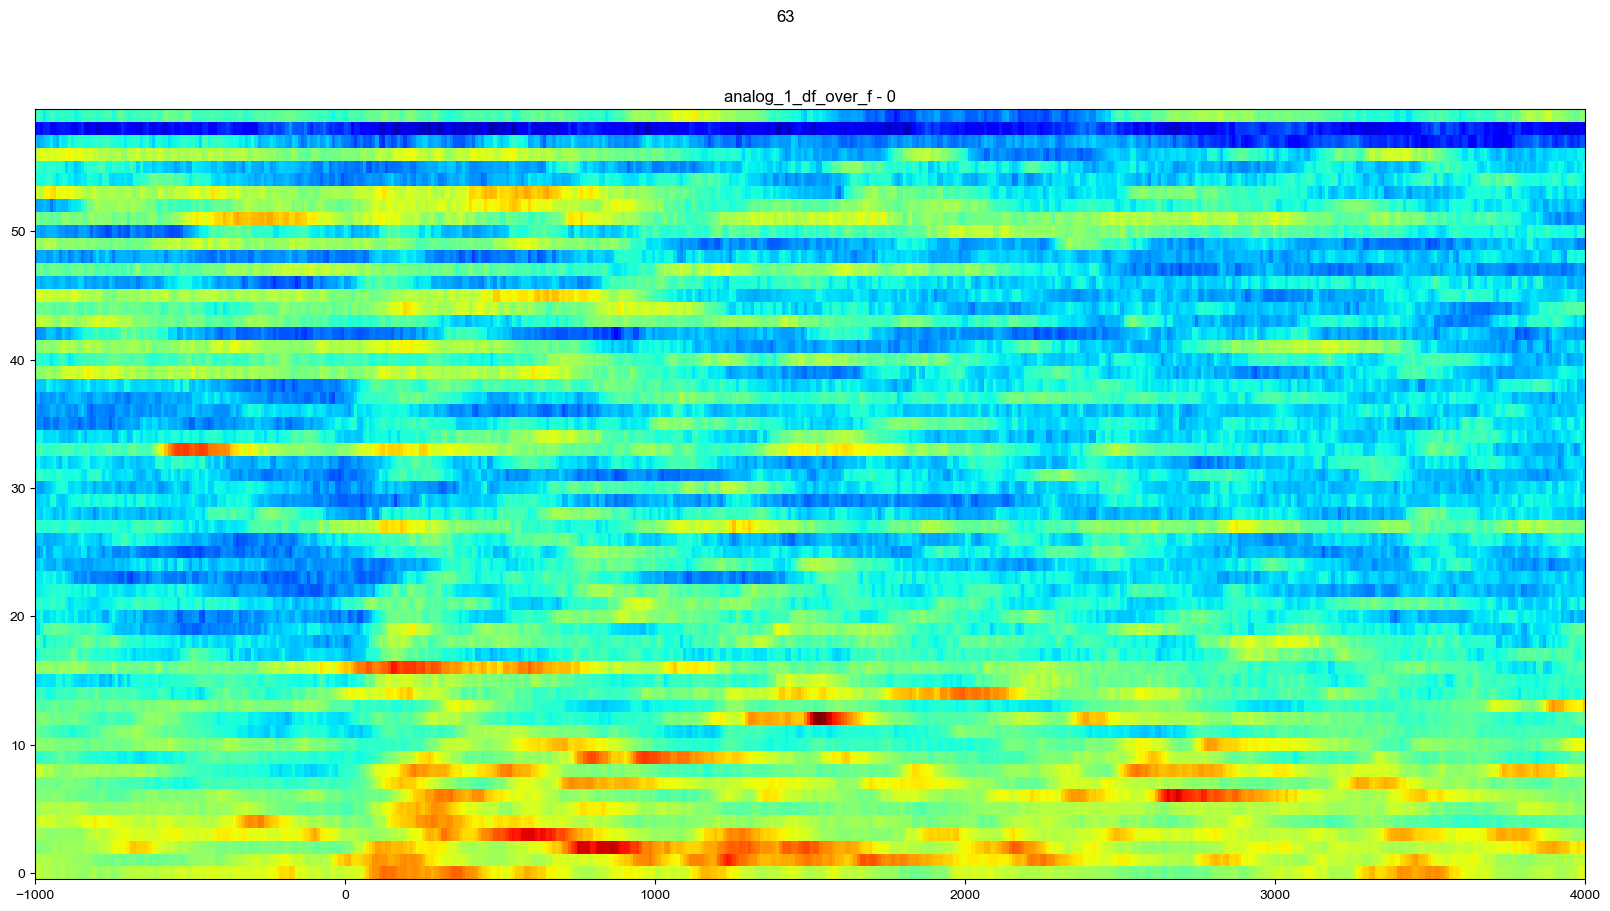

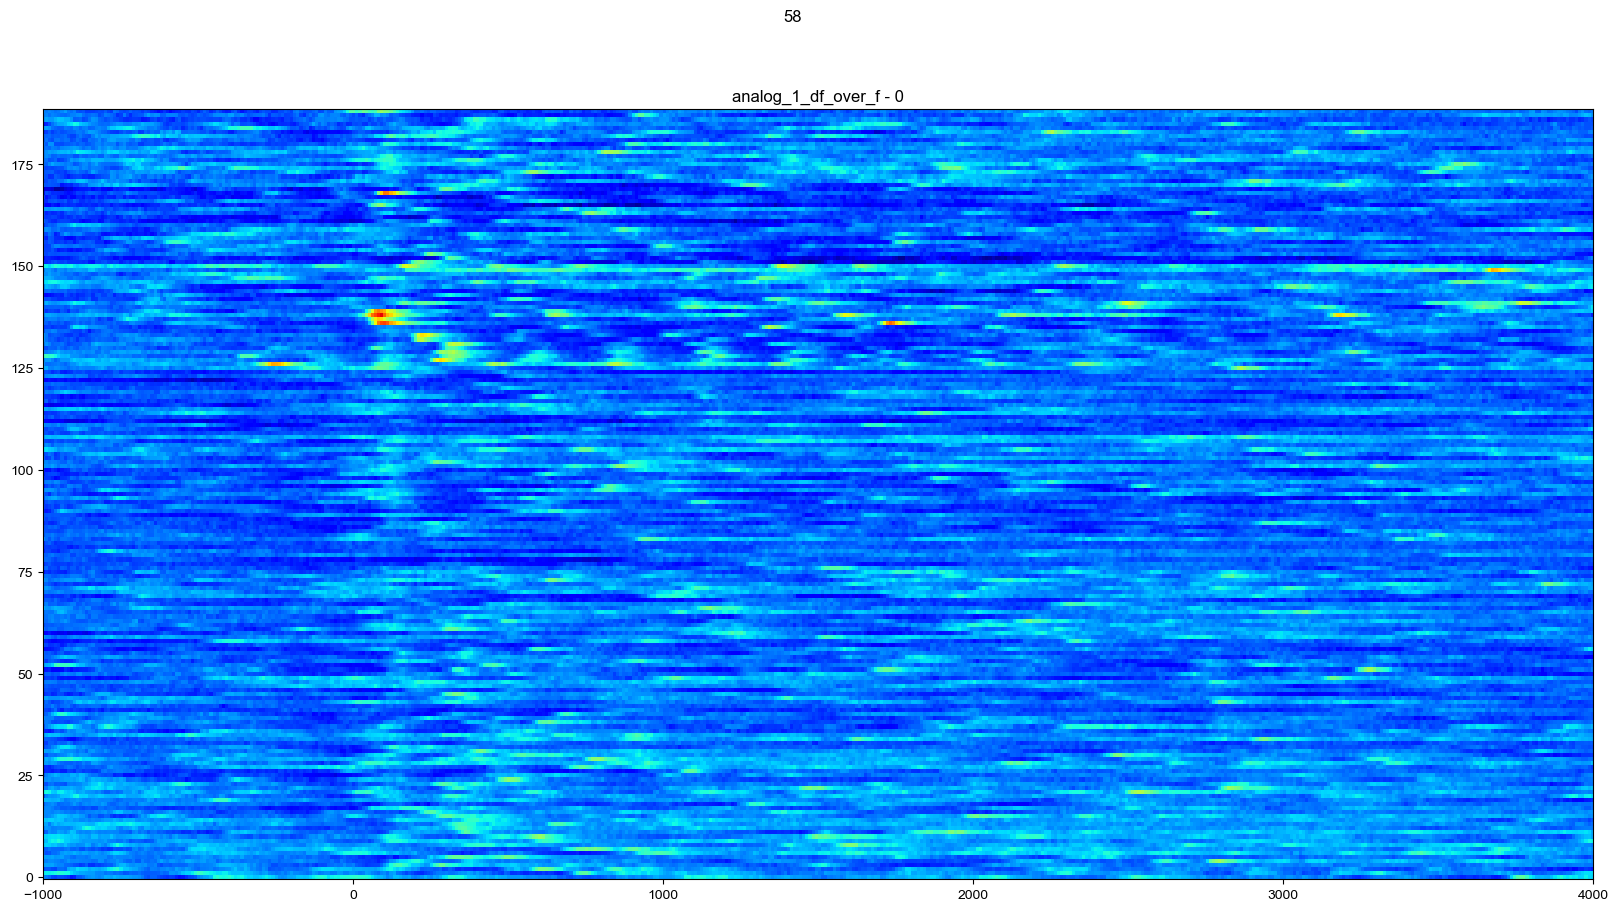

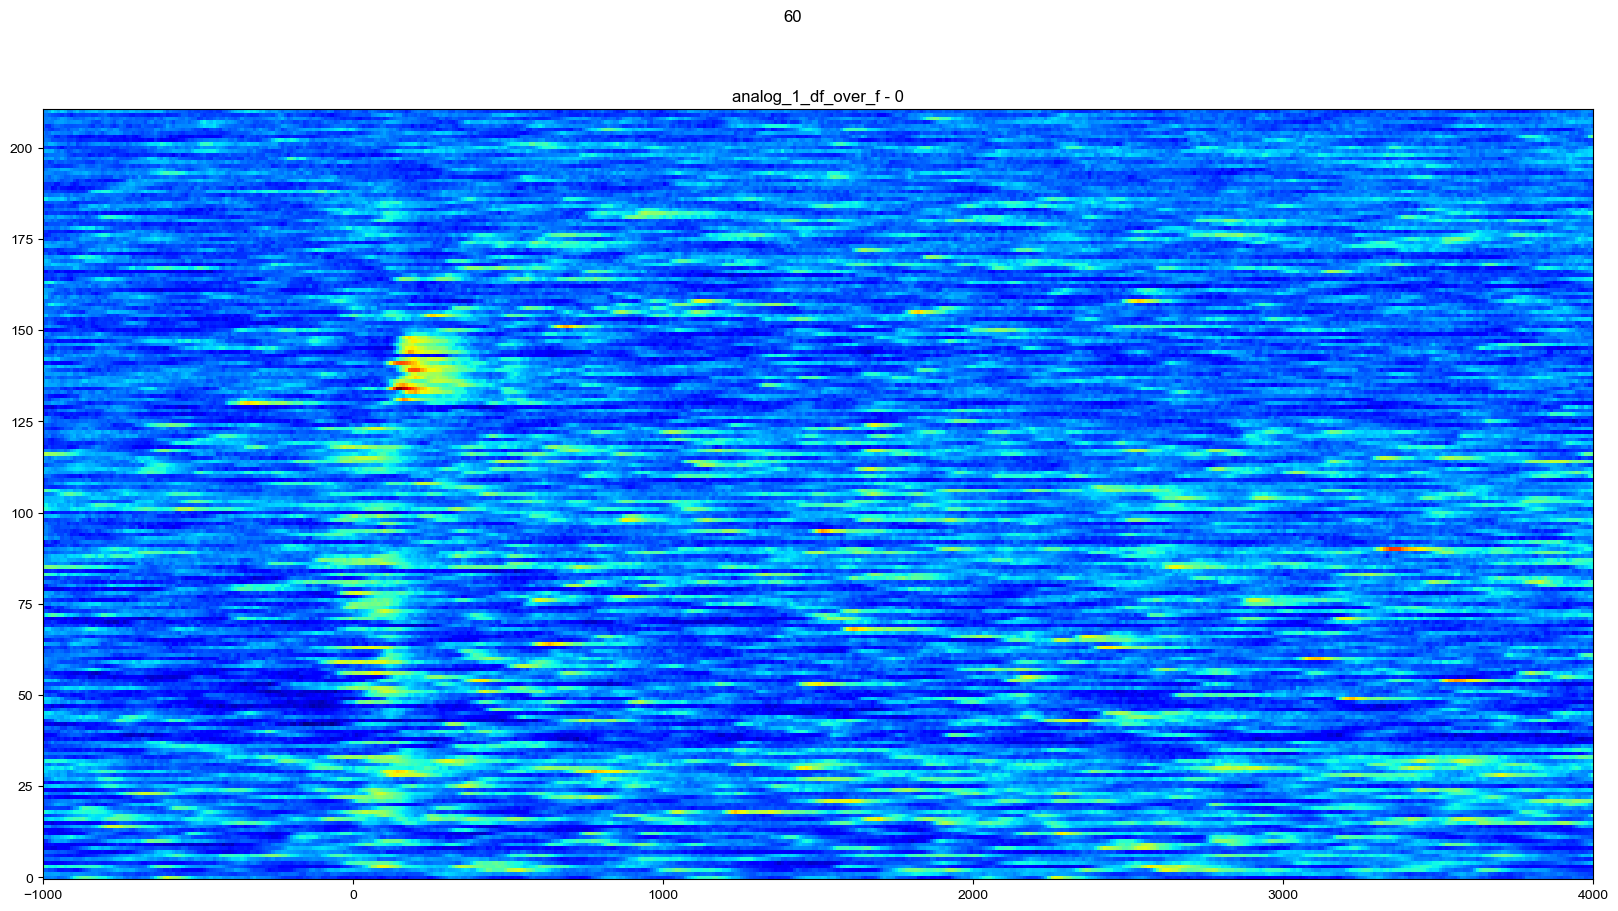

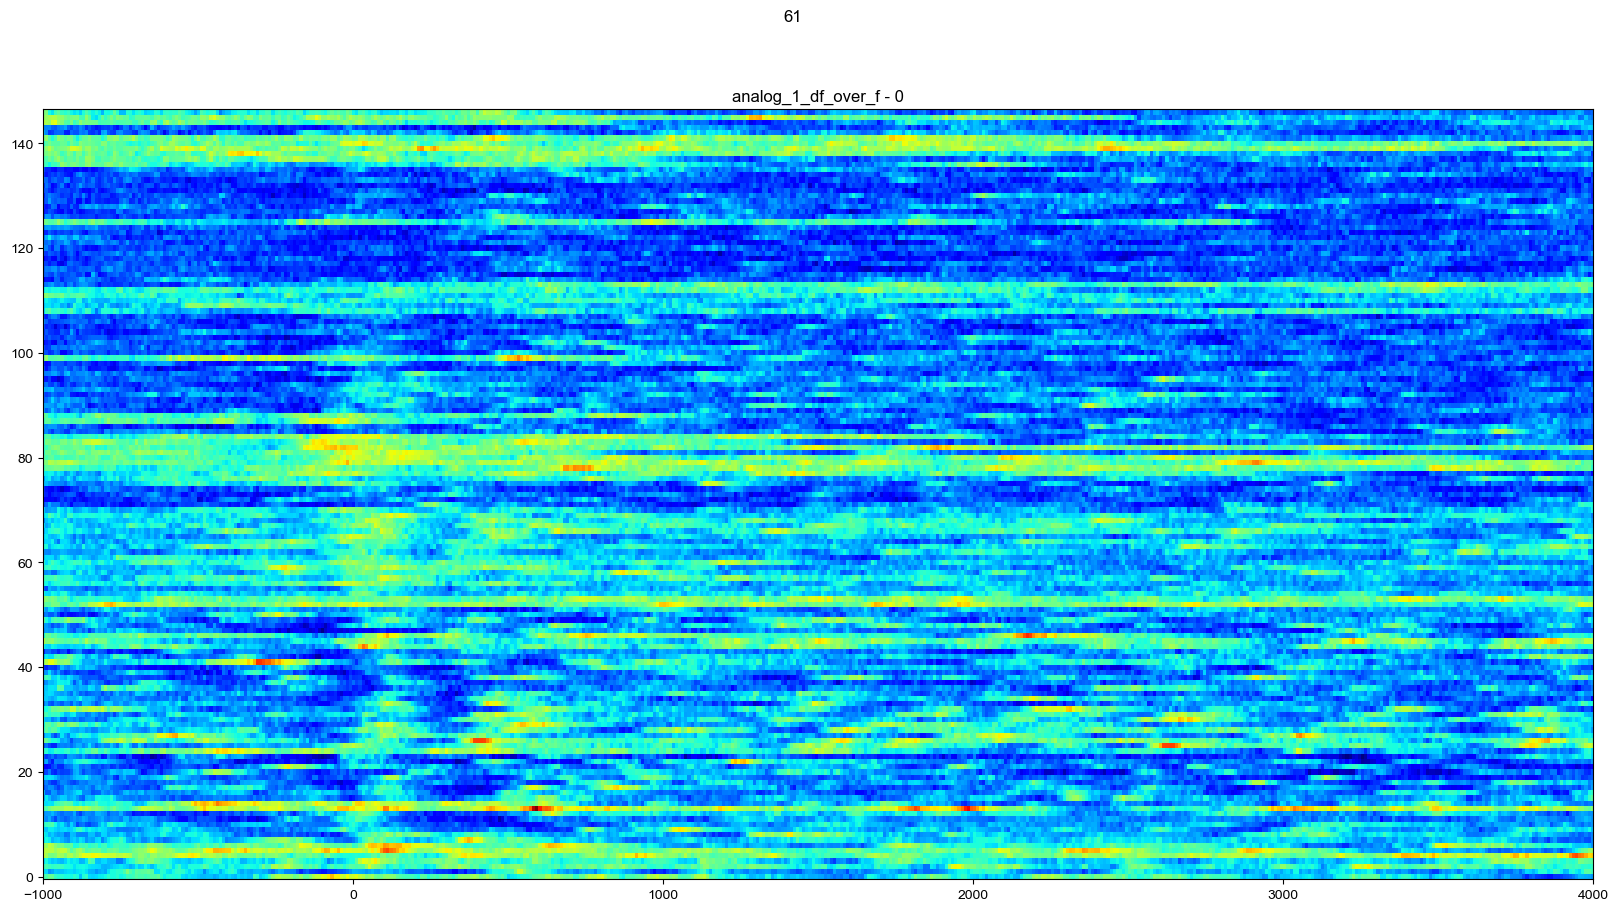

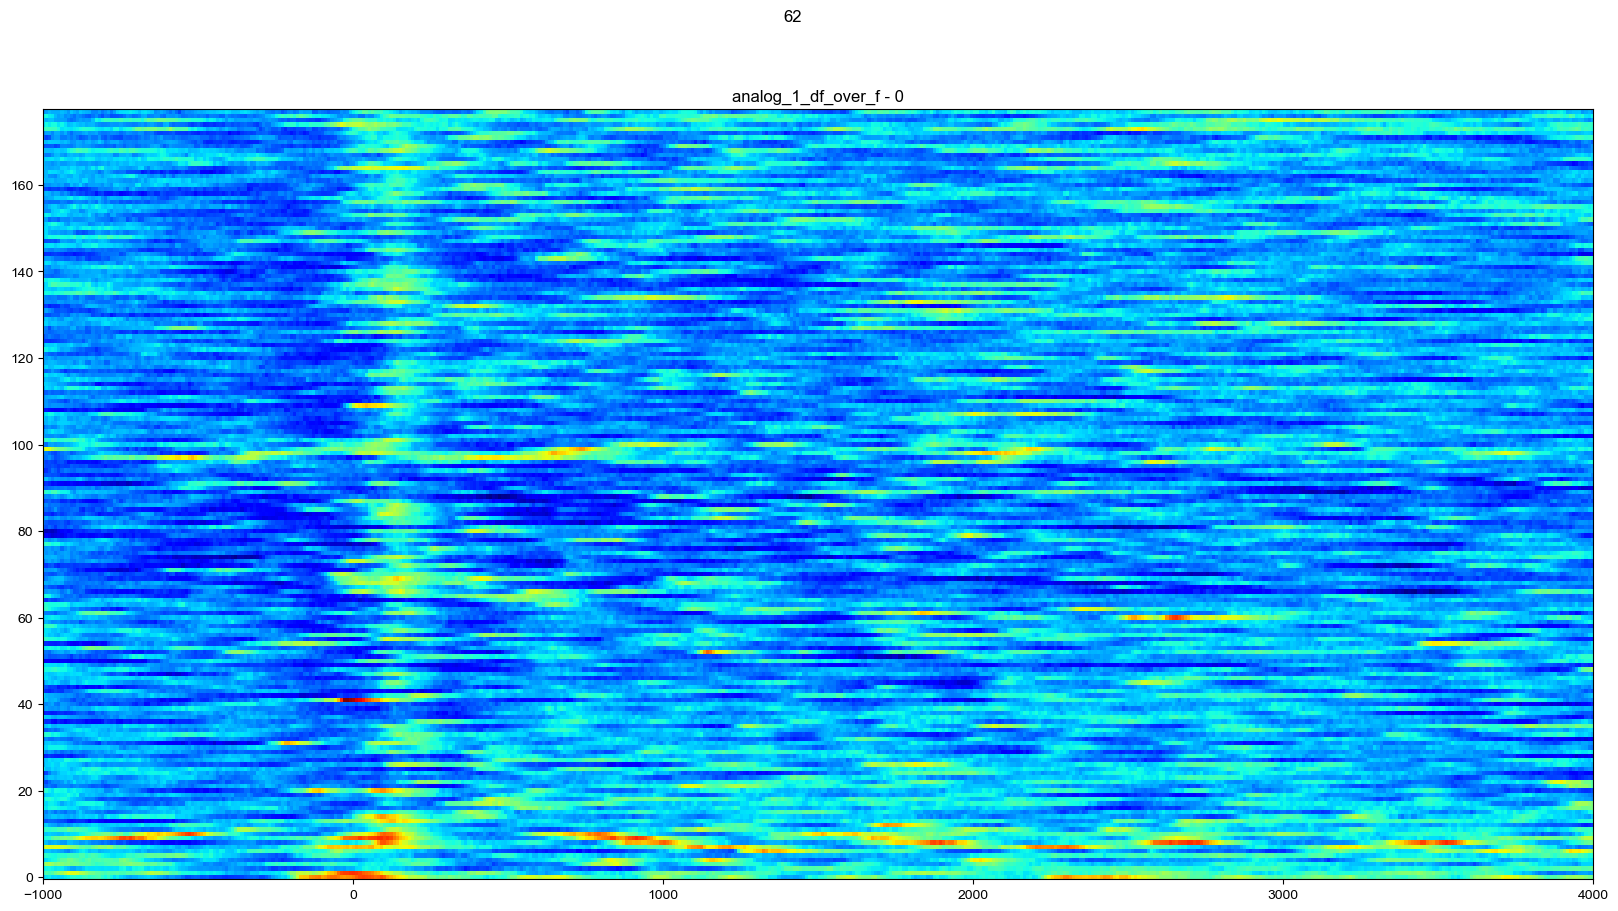

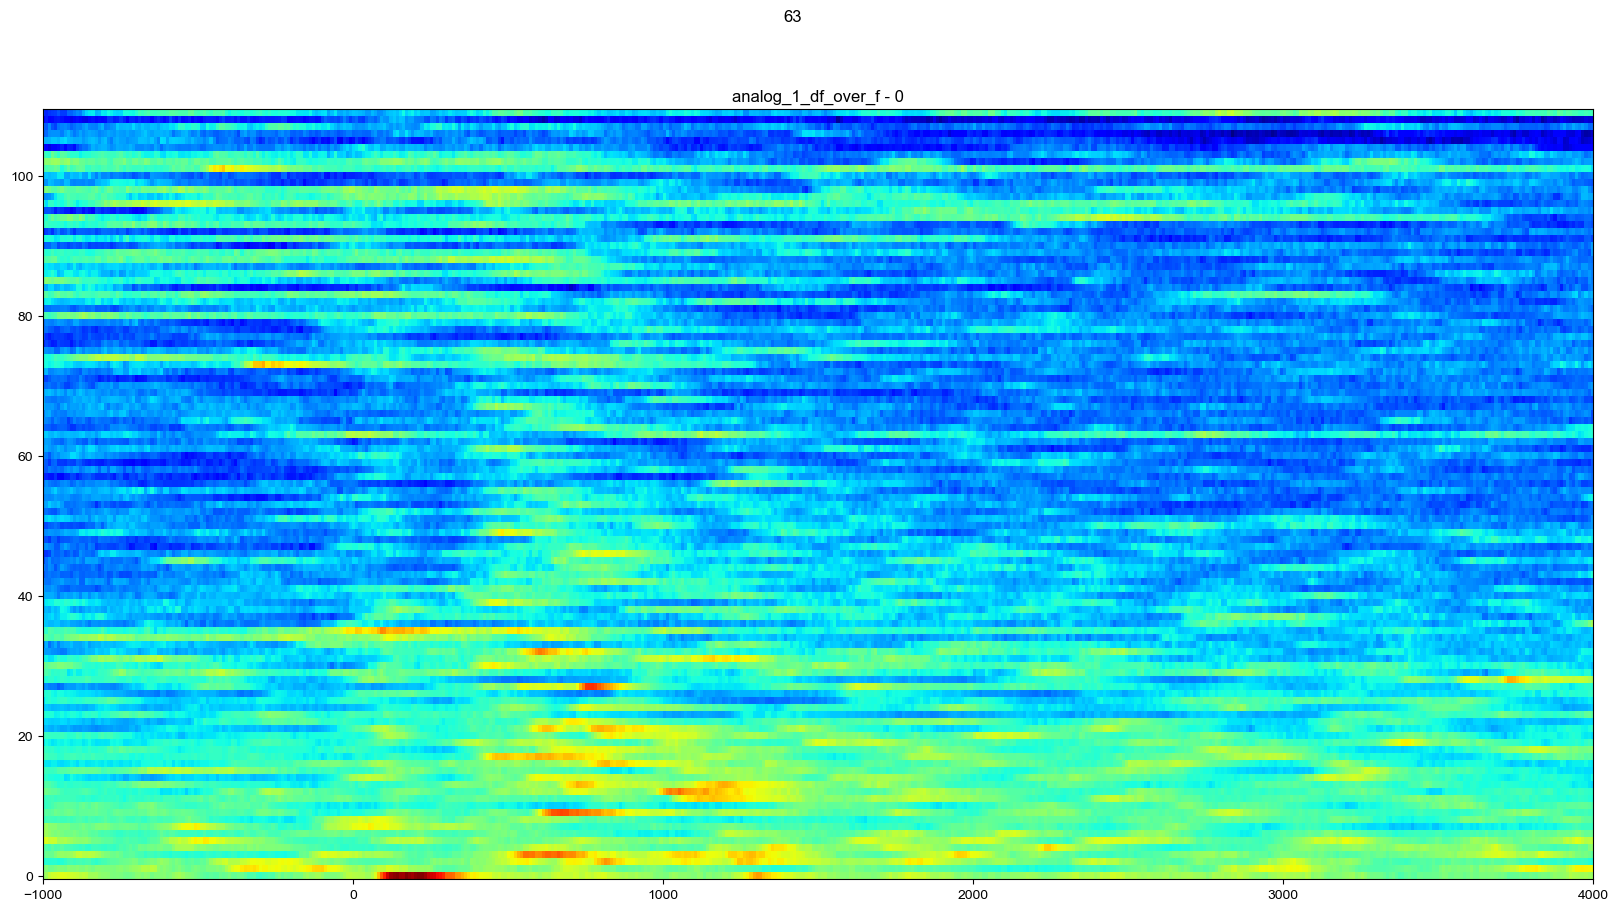

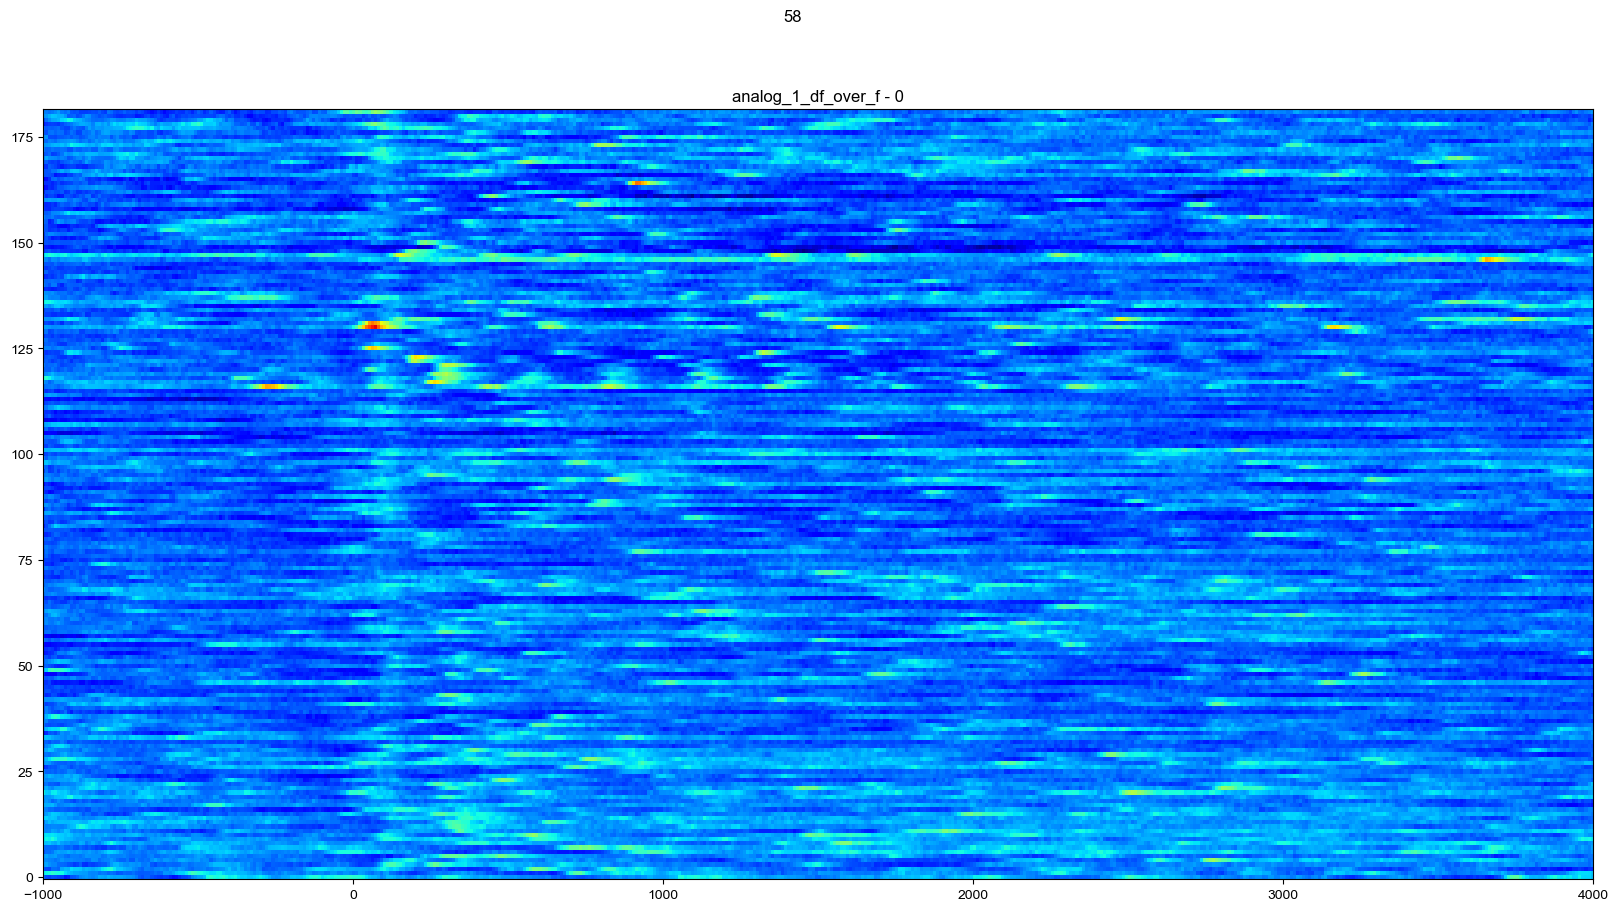

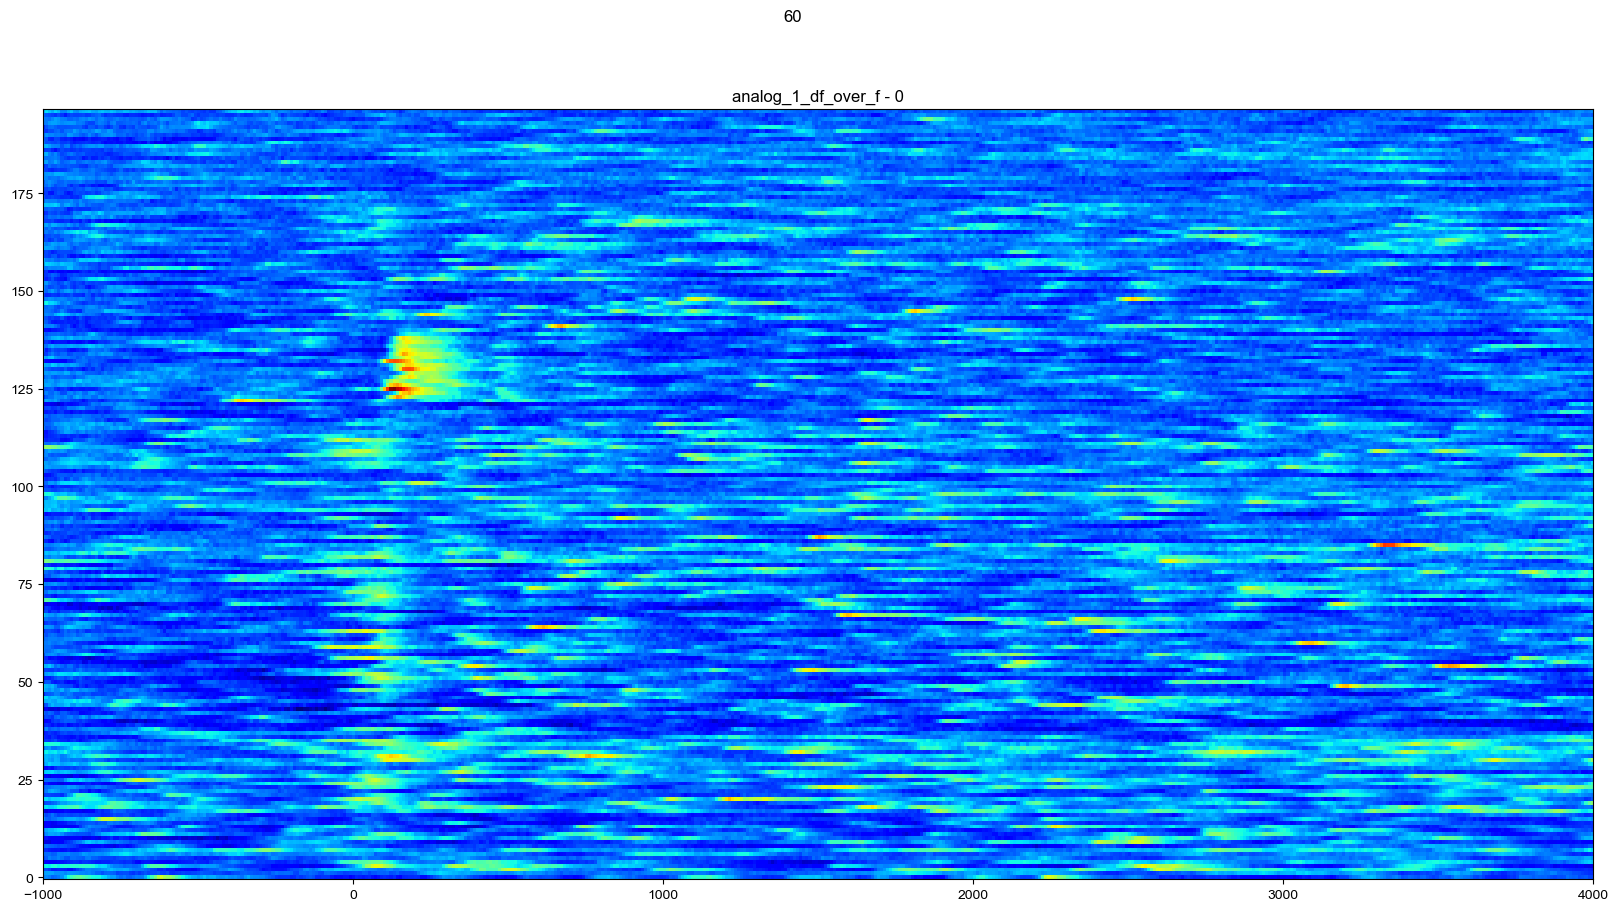

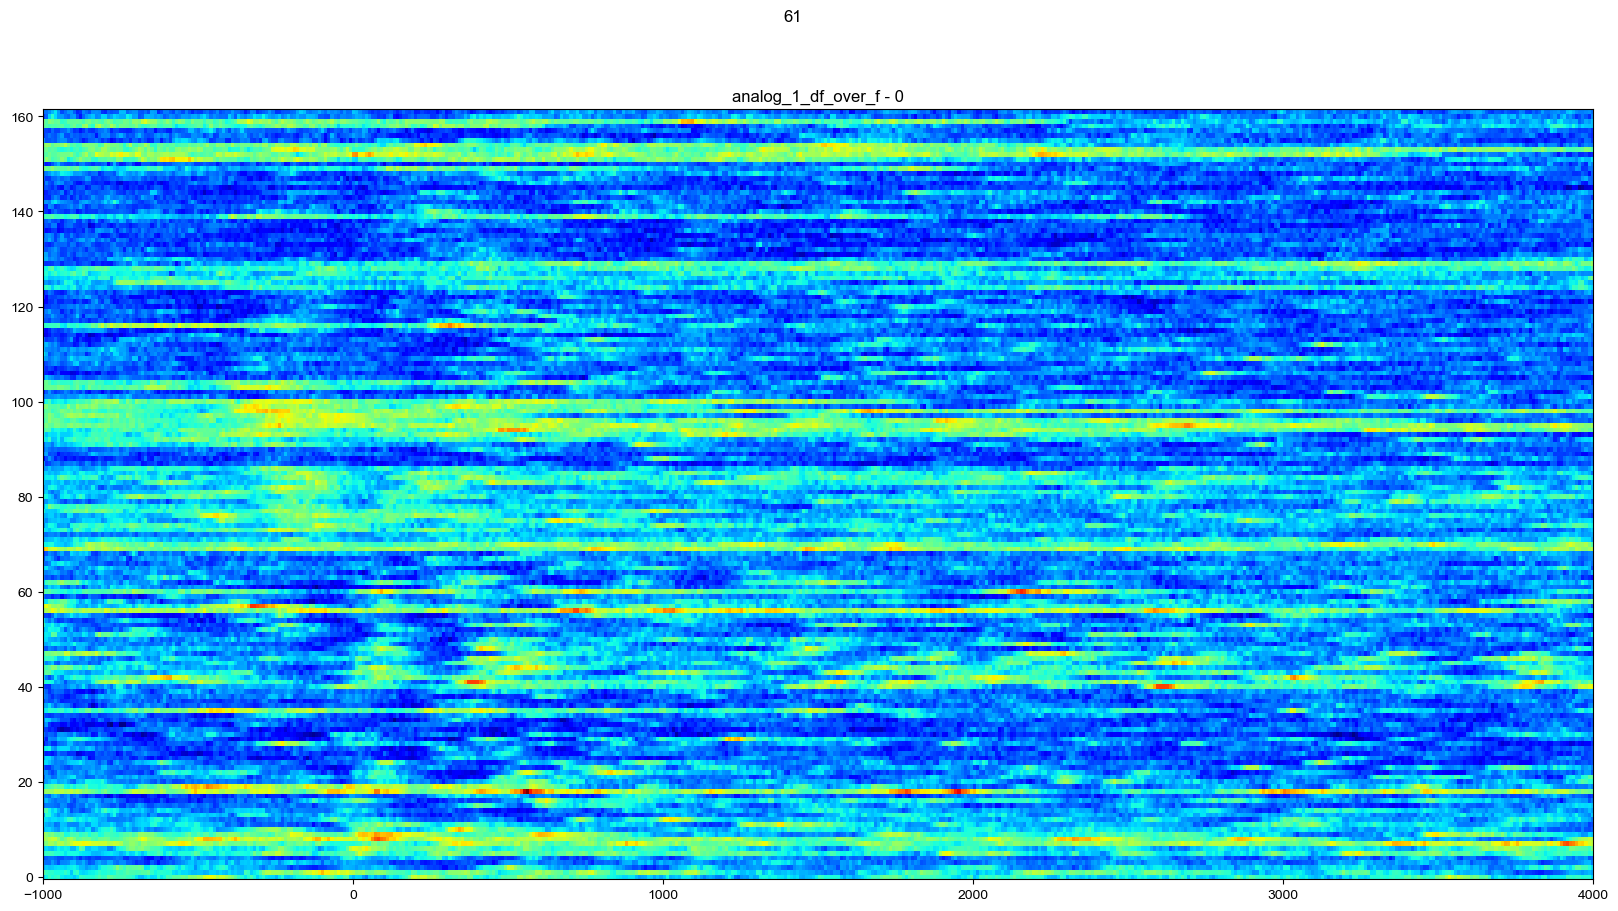

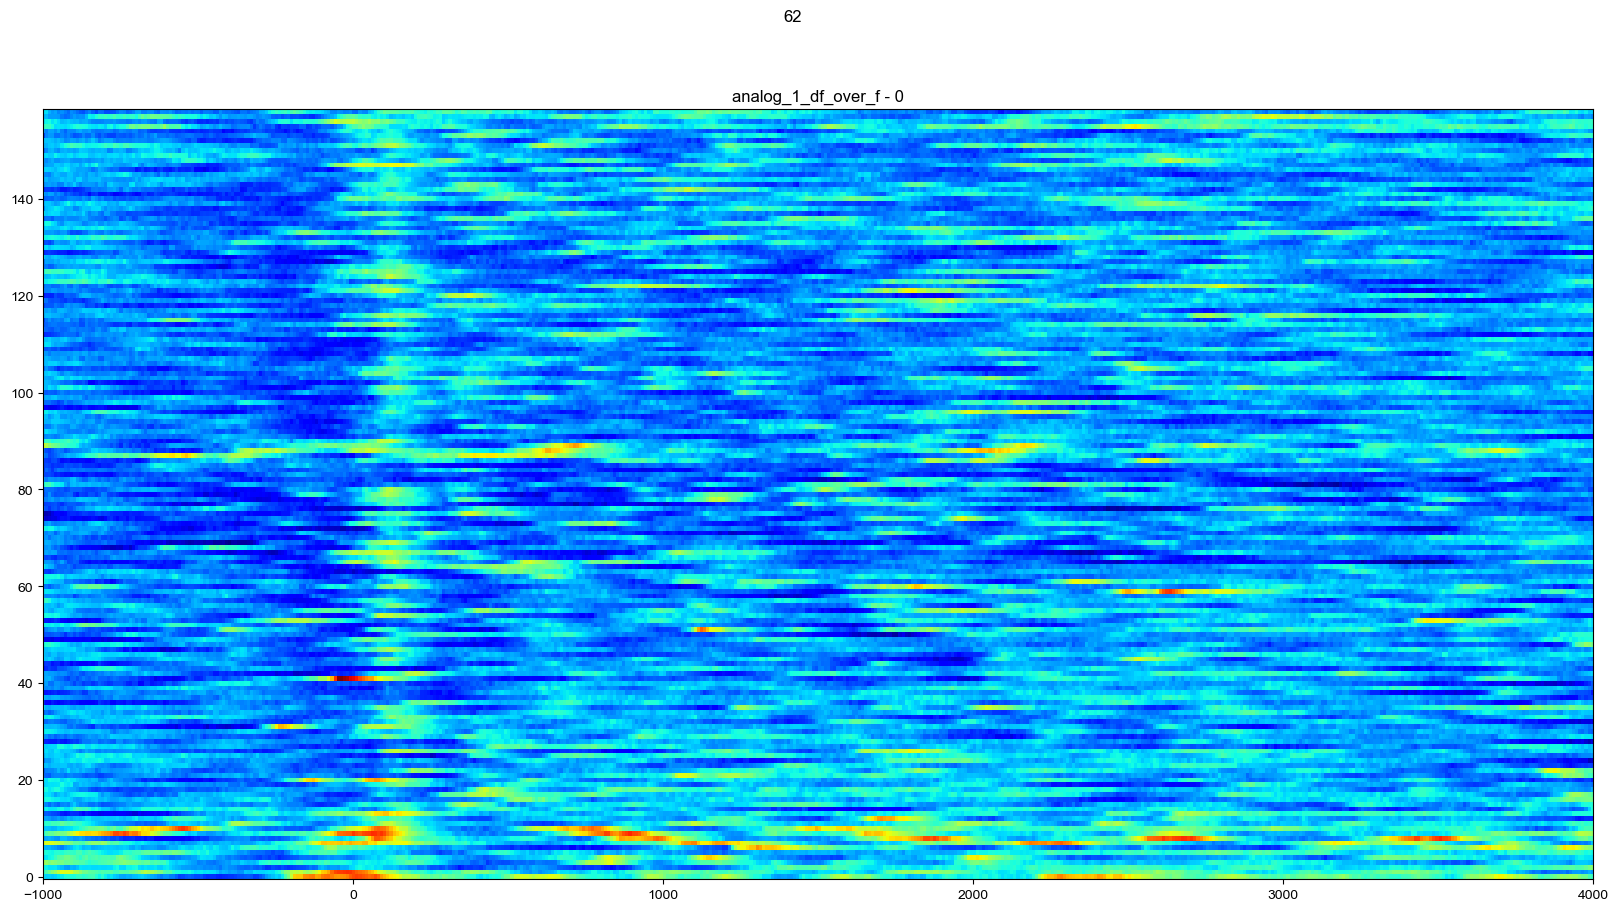

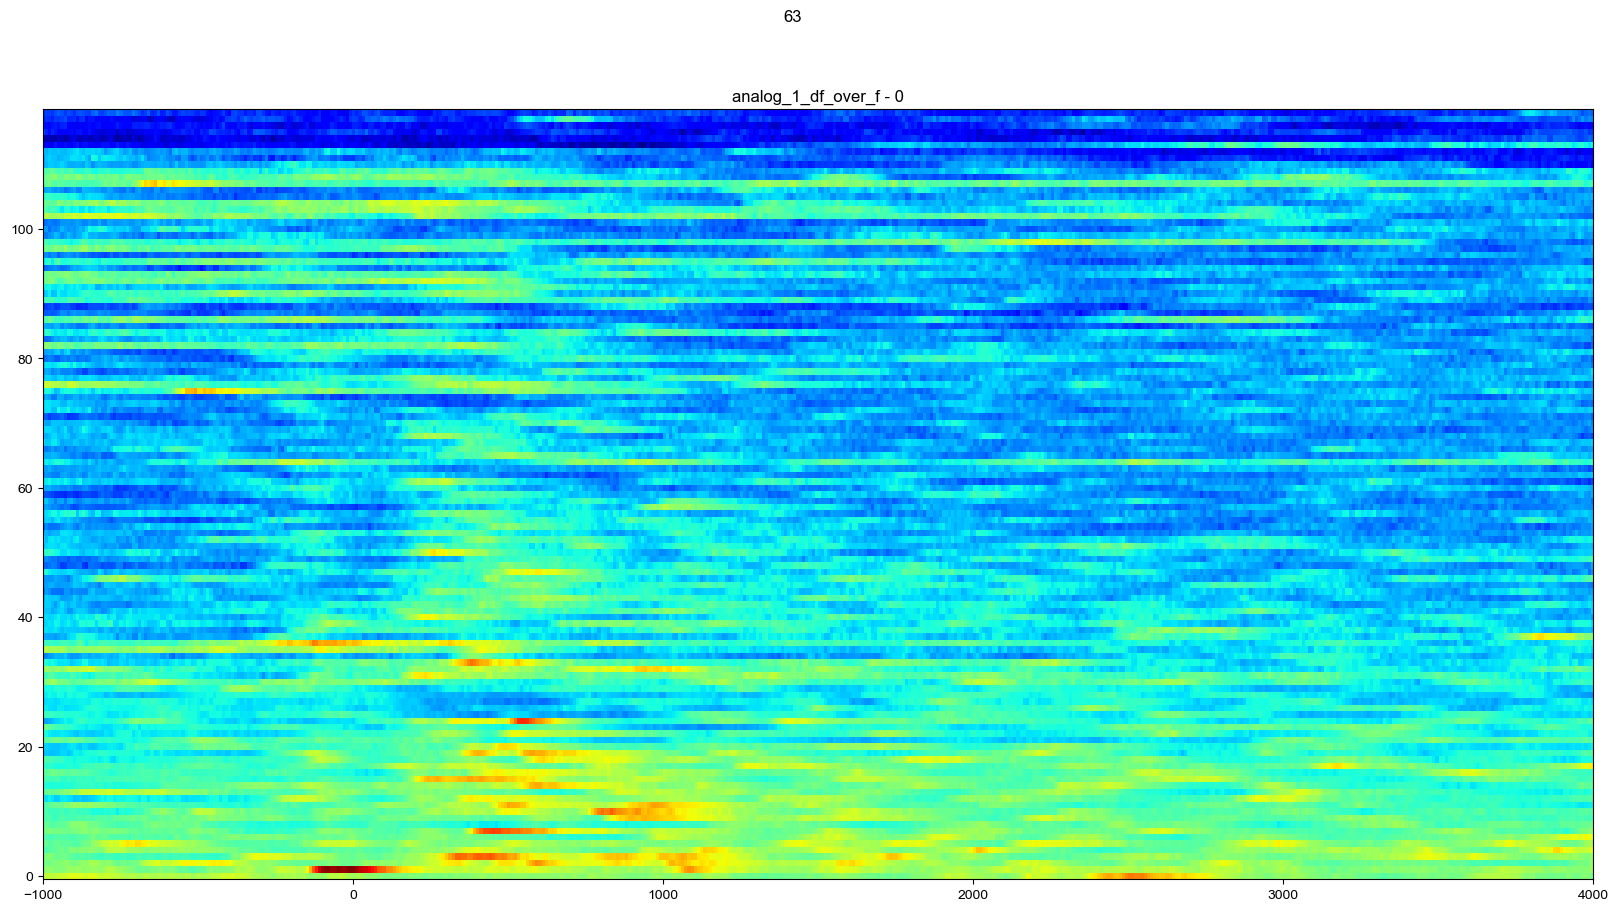

In [22]:
for idx, trig in enumerate(trigs):
    photo_dataset[idx].filter_reset()
    photo_dataset[idx].filterout_subjects([0,1,313,314,317,318])
    # photo_dataset[idx].filterout_dates(bad_days)
    # photo_dataset[idx].filter_lastNsessions(n = 10)
    photo_dataset[idx].heatmap(
        vars = ['analog_1_df_over_f'],
        time_lim = [-1000, 4000],
        clim_pctile = None,
        colormap = 'jet'
    )   
    photo_dataset[idx].filter_reset()